In [29]:
#assuming plotnine installed 
import pandas as pd
from plotnine import *
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [30]:
data = pd.read_csv('Prisoners_data.csv')
data.head()

,Sl. No.,State/UT,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total,Domicile - Belongs to State,...,Offences against Property - Arson - (Col. 19),Offences against Property - Burglary - (Col. 20),Total Offences against Property - (Col. 21),Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22),Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23),Other Crime Against Women - Insult to the Modesty of Women - (Col. 24),Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25),Undertrials of offences against women (Total of Col. 5 + Col. 8 + Col. 9 + Col.23 + Col.24) - (Col. 26),Other IPC Crimes - (Col. 27),Total Undertrials (IPC Crimes) - (Col. 28)
0,1,Andhra Pradesh,1882,1847,883,277,49,63,5001,2243,...,1,97,1044,34,102,8,110,406,345,2747
1,2,Arunachal Pradesh,31,54,38,4,0,0,127,92,...,19,10,69,0,0,0,0,9,4,126
2,3,Assam,3097,2232,930,224,4,8,6495,2687,...,39,270,1820,29,159,1,160,601,197,5616
3,4,Bihar,11675,17502,11623,2606,387,394,44187,7605,...,58,290,7532,74,642,27,669,4160,503,25890
4,5,Chhattisgarh,3268,5997,1940,541,67,150,11963,5785,...,13,373,1753,44,32,14,46,3024,732,10336


In [31]:
cols_to_drop = data.columns[13:25]
#dropping some columns as they have some redunadant information
data = data.drop(cols_to_drop, axis = 1)

In [32]:
data.describe()

,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total,Domicile - Belongs to State,Domicile - Belongs to other State,Domicile - Belongs to other Country,...,Offences against Property - Arson - (Col. 19),Offences against Property - Burglary - (Col. 20),Total Offences against Property - (Col. 21),Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22),Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23),Other Crime Against Women - Insult to the Modesty of Women - (Col. 24),Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25),Undertrials of offences against women (Total of Col. 5 + Col. 8 + Col. 9 + Col.23 + Col.24) - (Col. 26),Other IPC Crimes - (Col. 27),Total Undertrials (IPC Crimes) - (Col. 28)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,...,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,7715.153846,11645.076923,6543.923077,1828.538462,375.923077,495.076923,28603.692308,8049.692308,523.307692,87.692308,...,53.307692,437.923077,5963.923077,108.538462,320.307692,35.461538,355.769231,4963.076923,896.769231,21812.000000
std,21796.316049,32532.639345,18146.010568,5189.484529,1065.486308,1421.156097,80064.731536,23057.717742,1422.993660,242.932431,...,155.903842,1254.172875,16496.774111,310.364119,927.045623,95.342553,1019.991240,14081.743665,2559.522575,61091.629359
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,306.000000,99.000000,16.500000,2.000000,2.500000,489.000000,114.000000,13.500000,2.500000,...,0.000000,6.500000,76.500000,0.000000,0.000000,0.000000,0.000000,76.500000,25.500000,344.500000
50%,1882.000000,1847.000000,1243.000000,277.000000,67.000000,91.000000,5001.000000,1698.000000,145.000000,8.000000,...,4.000000,94.000000,1215.000000,10.000000,25.000000,5.000000,57.000000,601.000000,134.000000,3039.000000
75%,3972.500000,6847.500000,4133.500000,895.500000,232.000000,192.500000,16286.500000,4385.000000,328.500000,41.500000,...,23.500000,261.500000,3502.500000,71.500000,148.500000,16.000000,149.000000,3073.500000,554.000000,12455.000000
max,100297.000000,151386.000000,85071.000000,23771.000000,4887.000000,6436.000000,371848.000000,104646.000000,6803.000000,1140.000000,...,693.000000,5693.000000,77531.000000,1411.000000,4164.000000,461.000000,4625.000000,64520.000000,11658.000000,283556.000000


### There are total of 61 columns describing the data. The description includes personal information like education, domicile etc. of the prisoners and the crimes commited.

In [33]:
%%capture
columns = data.columns
states = data['State/UT']
print(columns)
#printing all the columns to see once the categories in the data

#### After seeing the columns of the data, analysing each category separately makes sense. We have 
* Education
* Domicile
* Convicts
* Undertrials
* Gender
* Regligion
* Age groups
* Based on offence

as the main categories. We'll visualize the data categorywise and see the visualization for some states as well

## Education

In [34]:
education_data = data.iloc[:,0:9]
education_data.head()

,Sl. No.,State/UT,Educational Standard - Illiterate,Educational Standard - Below Class X,Educational Standard - Class X & above but below Graduation,Educational Standard - Graduate,Educational Standard - Holding Tech. Degree/ Diploma,Educational Standard - Post Graduate,Educational Standard - Total
0,1,Andhra Pradesh,1882,1847,883,277,49,63,5001
1,2,Arunachal Pradesh,31,54,38,4,0,0,127
2,3,Assam,3097,2232,930,224,4,8,6495
3,4,Bihar,11675,17502,11623,2606,387,394,44187
4,5,Chhattisgarh,3268,5997,1940,541,67,150,11963


In [35]:
for each in education_data.columns[2:]:
    education_data[each] = (education_data[each]/education_data['Educational Standard - Total'])*100

In [36]:
education_data.columns

Index(['Sl. No.', 'State/UT', 'Educational Standard - Illiterate',
       'Educational Standard - Below Class X',
       'Educational Standard - Class X & above but below Graduation',
       'Educational Standard - Graduate',
       'Educational Standard - Holding Tech. Degree/ Diploma',
       'Educational Standard - Post Graduate', 'Educational Standard - Total'],
      dtype='object')

In [37]:
labels = ['Illiterate', 'Below Class X', 'Class X', 'Graduate', 'Tech', 'PostGraduate']
values = [data['Educational Standard - Illiterate'].sum(), data['Educational Standard - Below Class X'].sum(), data['Educational Standard - Class X & above but below Graduation'].sum(), data['Educational Standard - Graduate'].sum(), data['Educational Standard - Holding Tech. Degree/ Diploma'].sum(), data['Educational Standard - Post Graduate'].sum()]
colors = ['purple', 'orange', 'pink', 'green', 'blue', 'red']

pull = [0.1, 0, 0, 0, 0, 0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), pull=pull)])
fig.update_layout(title='Education Level')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

### Here we can see from the All-India stats that (almost) 70% of the criminals are illiterate, around 30% are completely illiterate and a major chunk around 40% has dropped out even before 10th standard.

## Domicile

In [38]:
columns[9:13]

Index(['Domicile - Belongs to State', 'Domicile - Belongs to other State',
       'Domicile - Belongs to other Country', 'Domicile - Total'],
      dtype='object')

In [39]:
domicile = data.iloc[:28,9:13]
domicile['State/UT'] = states[:28]
domicile['Home State Other State Ratio'] = domicile['Domicile - Belongs to State']//domicile['Domicile - Belongs to other State']

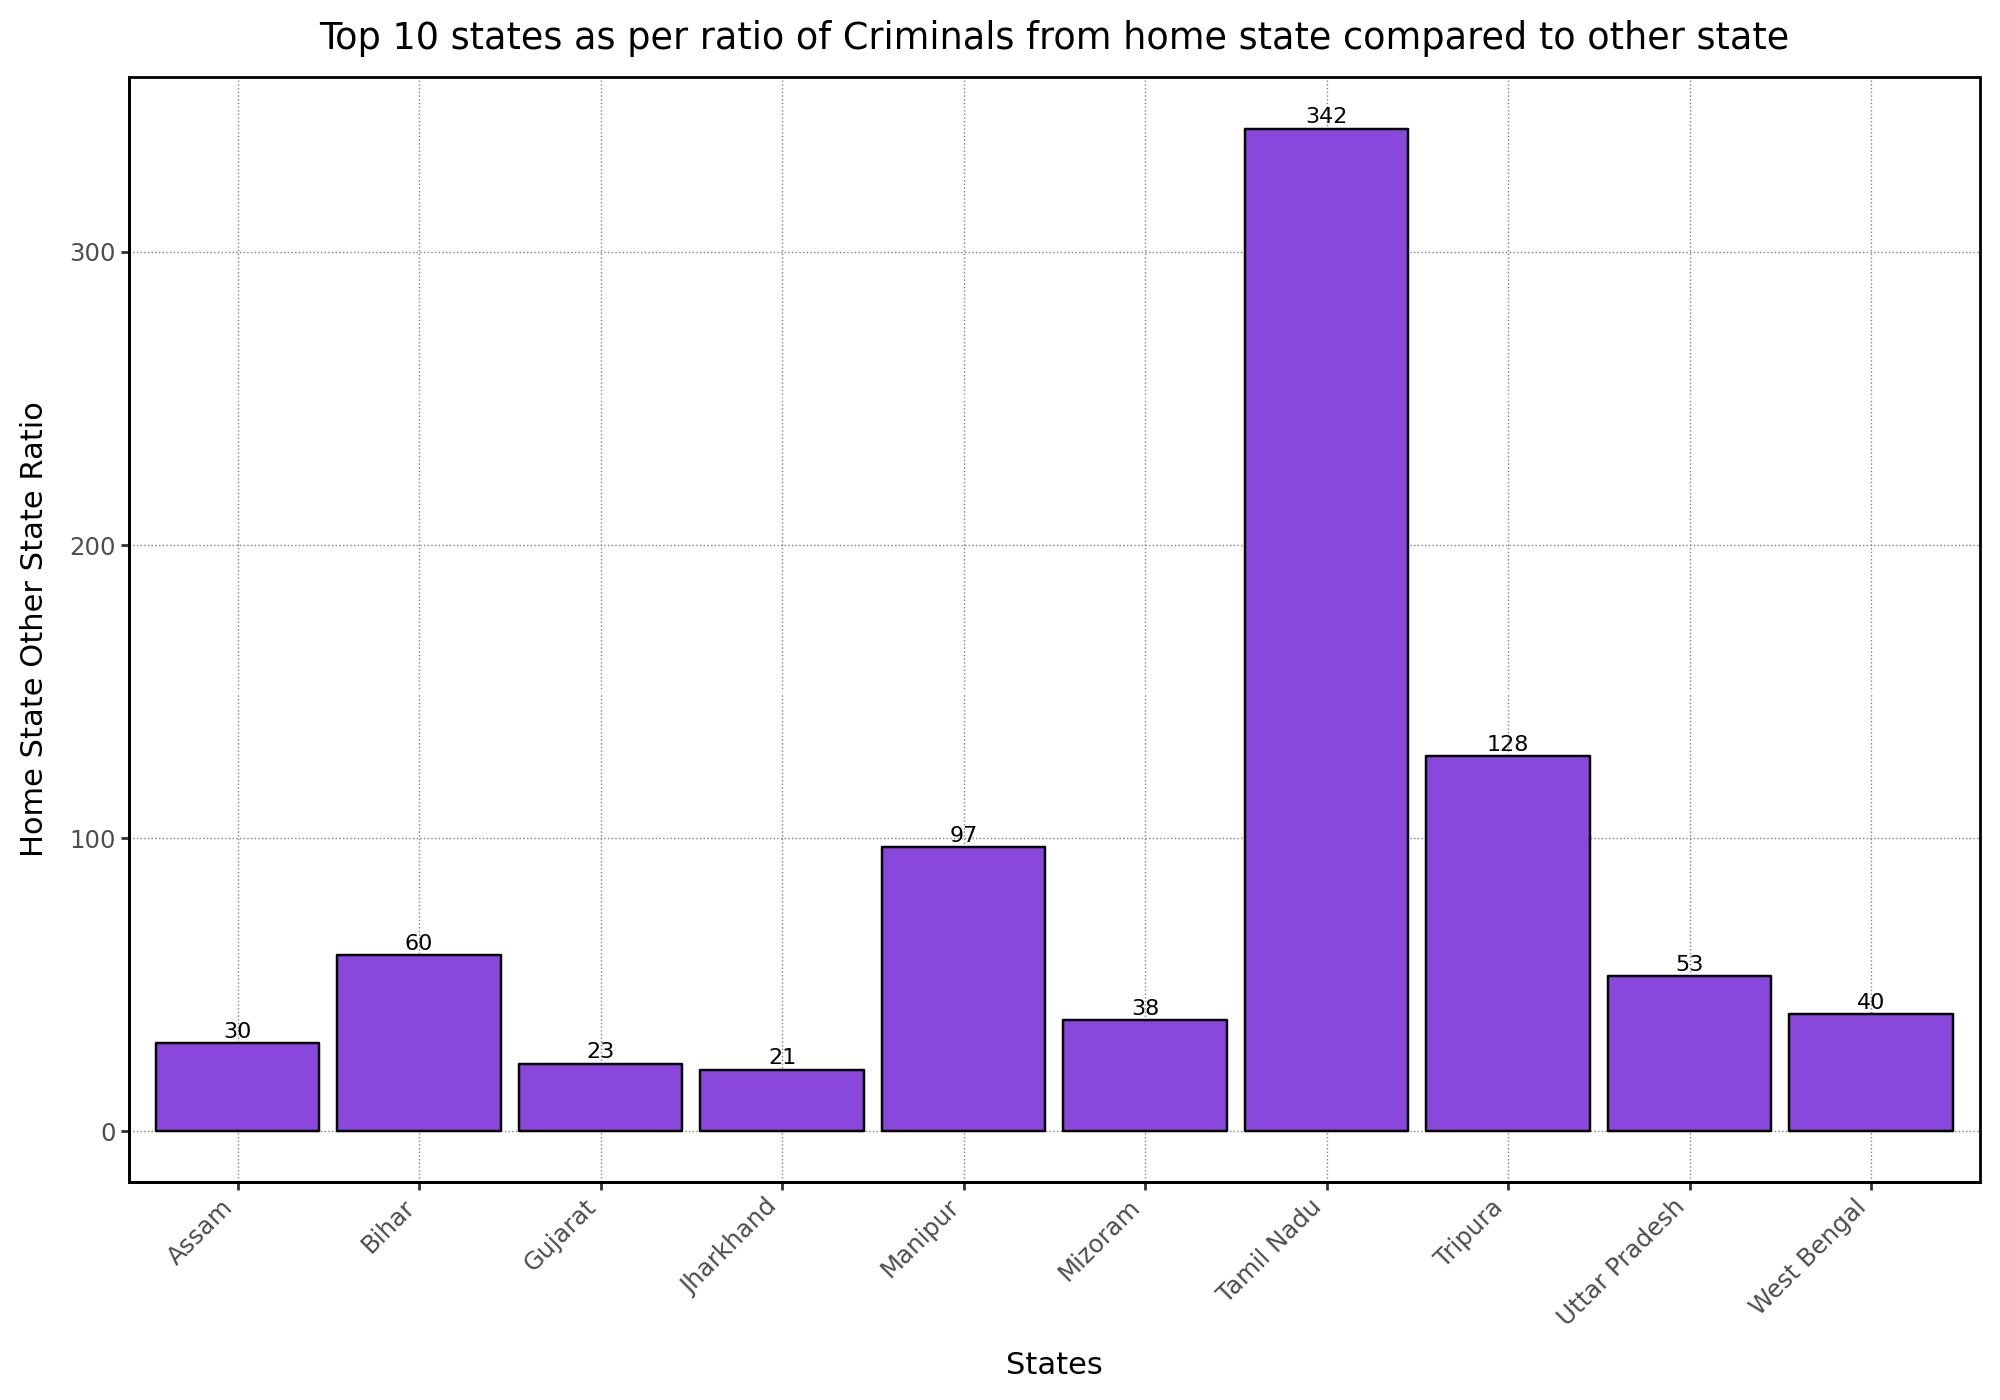

In [40]:
domicile = domicile.sort_values(by='Home State Other State Ratio', ascending=False)
dom_top10 = domicile.iloc[:10,:]
p = (ggplot(dom_top10, aes(x='State/UT', y='Home State Other State Ratio',label='Home State Other State Ratio'))
             + geom_bar(stat='identity', fill='#8947DC', color='black')
             + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')
             + labs(x='States', y='Home State Other State Ratio', title='Top 10 states as per ratio of Criminals from home state compared to other state')
             + theme(axis_text_x=element_text(rotation=45, hjust=1),
                     panel_background=element_rect(fill='white'),
                     axis_line=element_line(color='black'),
                     panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),
                     panel_border=element_rect(color='black', fill=None),
                     figure_size=(10, 7))
             )
p.show()

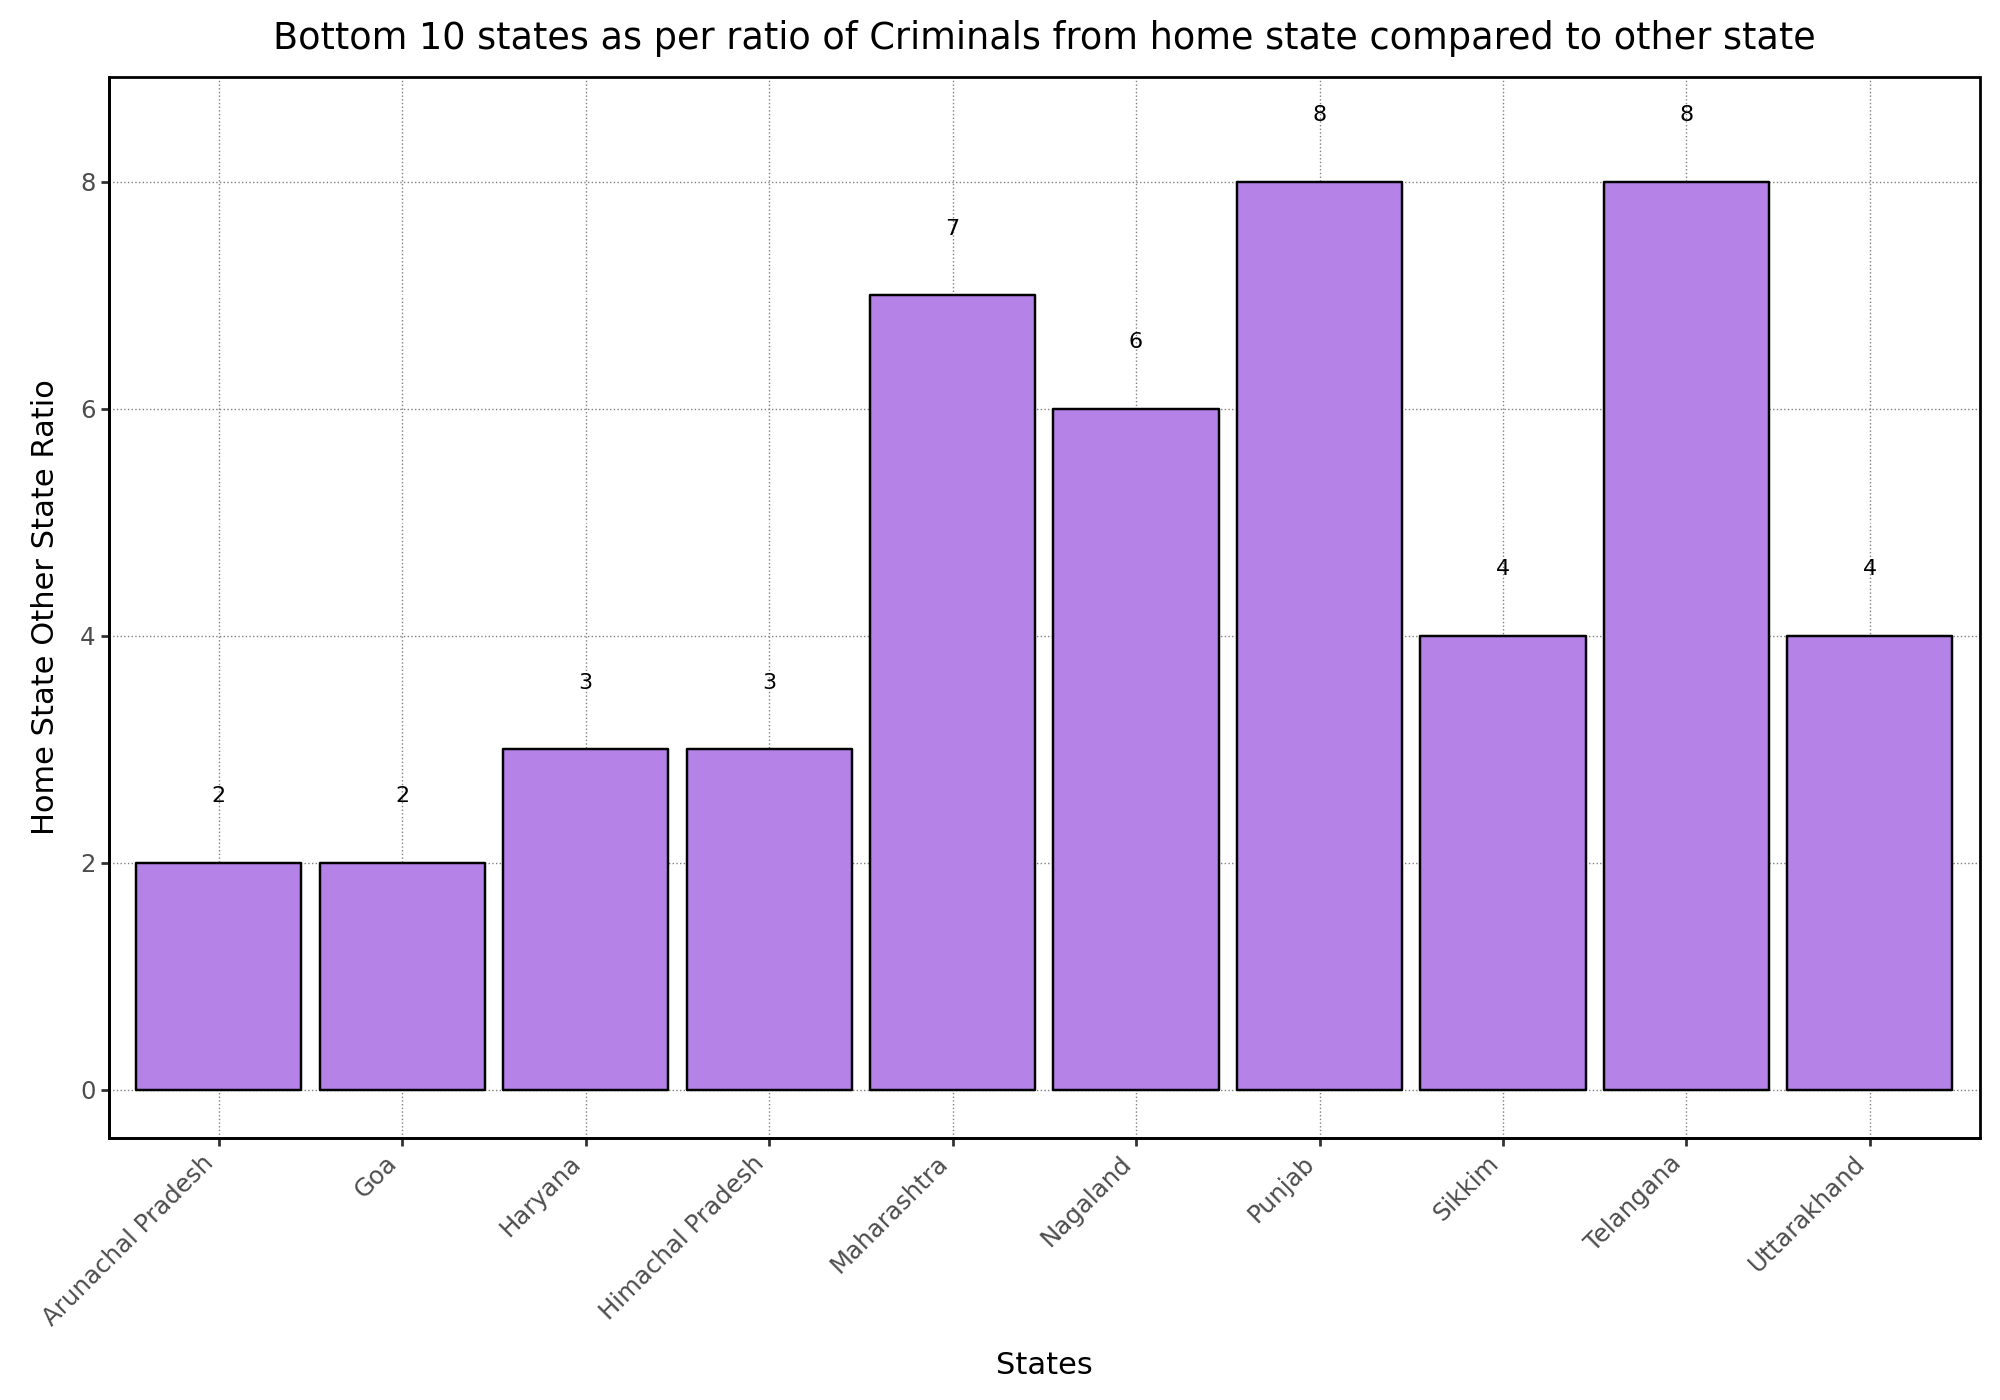

In [41]:
domicile = domicile.sort_values(by='Home State Other State Ratio', ascending=True)
dom_bot10 = domicile.iloc[:10,:]
p = (ggplot(dom_bot10, aes(x='State/UT', y='Home State Other State Ratio',label='Home State Other State Ratio'))
             + geom_bar(stat='identity', fill='#B582E8', color='black')
             + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')
             + labs(x='States', y='Home State Other State Ratio', title='Bottom 10 states as per ratio of Criminals from home state compared to other state')
             + theme(axis_text_x=element_text(rotation=45, hjust=1),
                     panel_background=element_rect(fill='white'),
                     axis_line=element_line(color='black'),
                     panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),
                     panel_border=element_rect(color='black', fill=None),
                     figure_size=(10, 7))
             )
p.show()

### The Total(All India) value of Home State/ Other State is nearly around 15 but there are some states where the ratio is signigicantly higher like Tamil Nadu, West Bengal, Uttar Pradesh and Bihar

## Age Groups (Convicts)

In [42]:
age_groups = columns[39:48]
print(age_groups)

Index(['16 - 18 Years - No. of Convicts', '16 - 18 Years - % Share',
       '18 - 30 Years - No. of Convicts', '18 - 30 Years - % Share',
       '30 - 50 Years - No. of Convicts', '30 - 50 Years - % Share',
       '50 Years & Above - No. of Convicts', '50 Years & Above - % Share',
       'Total - No. of Convicts (AgeGroup)'],
      dtype='object')


In [43]:
age = data.iloc[:,39:48]
age['State/UT'] = states

#### Piechart showing age distribution in ALL-India

In [44]:
labels = ['18 - 30 Years', '30 - 50 Years', '50 Years & Above']
values = [age['18 - 30 Years - No. of Convicts'][len(age)-1],age['30 - 50 Years - No. of Convicts'][len(age)-1],age['50 Years & Above - No. of Convicts'][len(age)-1]]

pull = [0.1, 0, 0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), pull=pull)])
fig.update_layout(title='Age Distribution')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

#### Top 10 states for each of the age groups

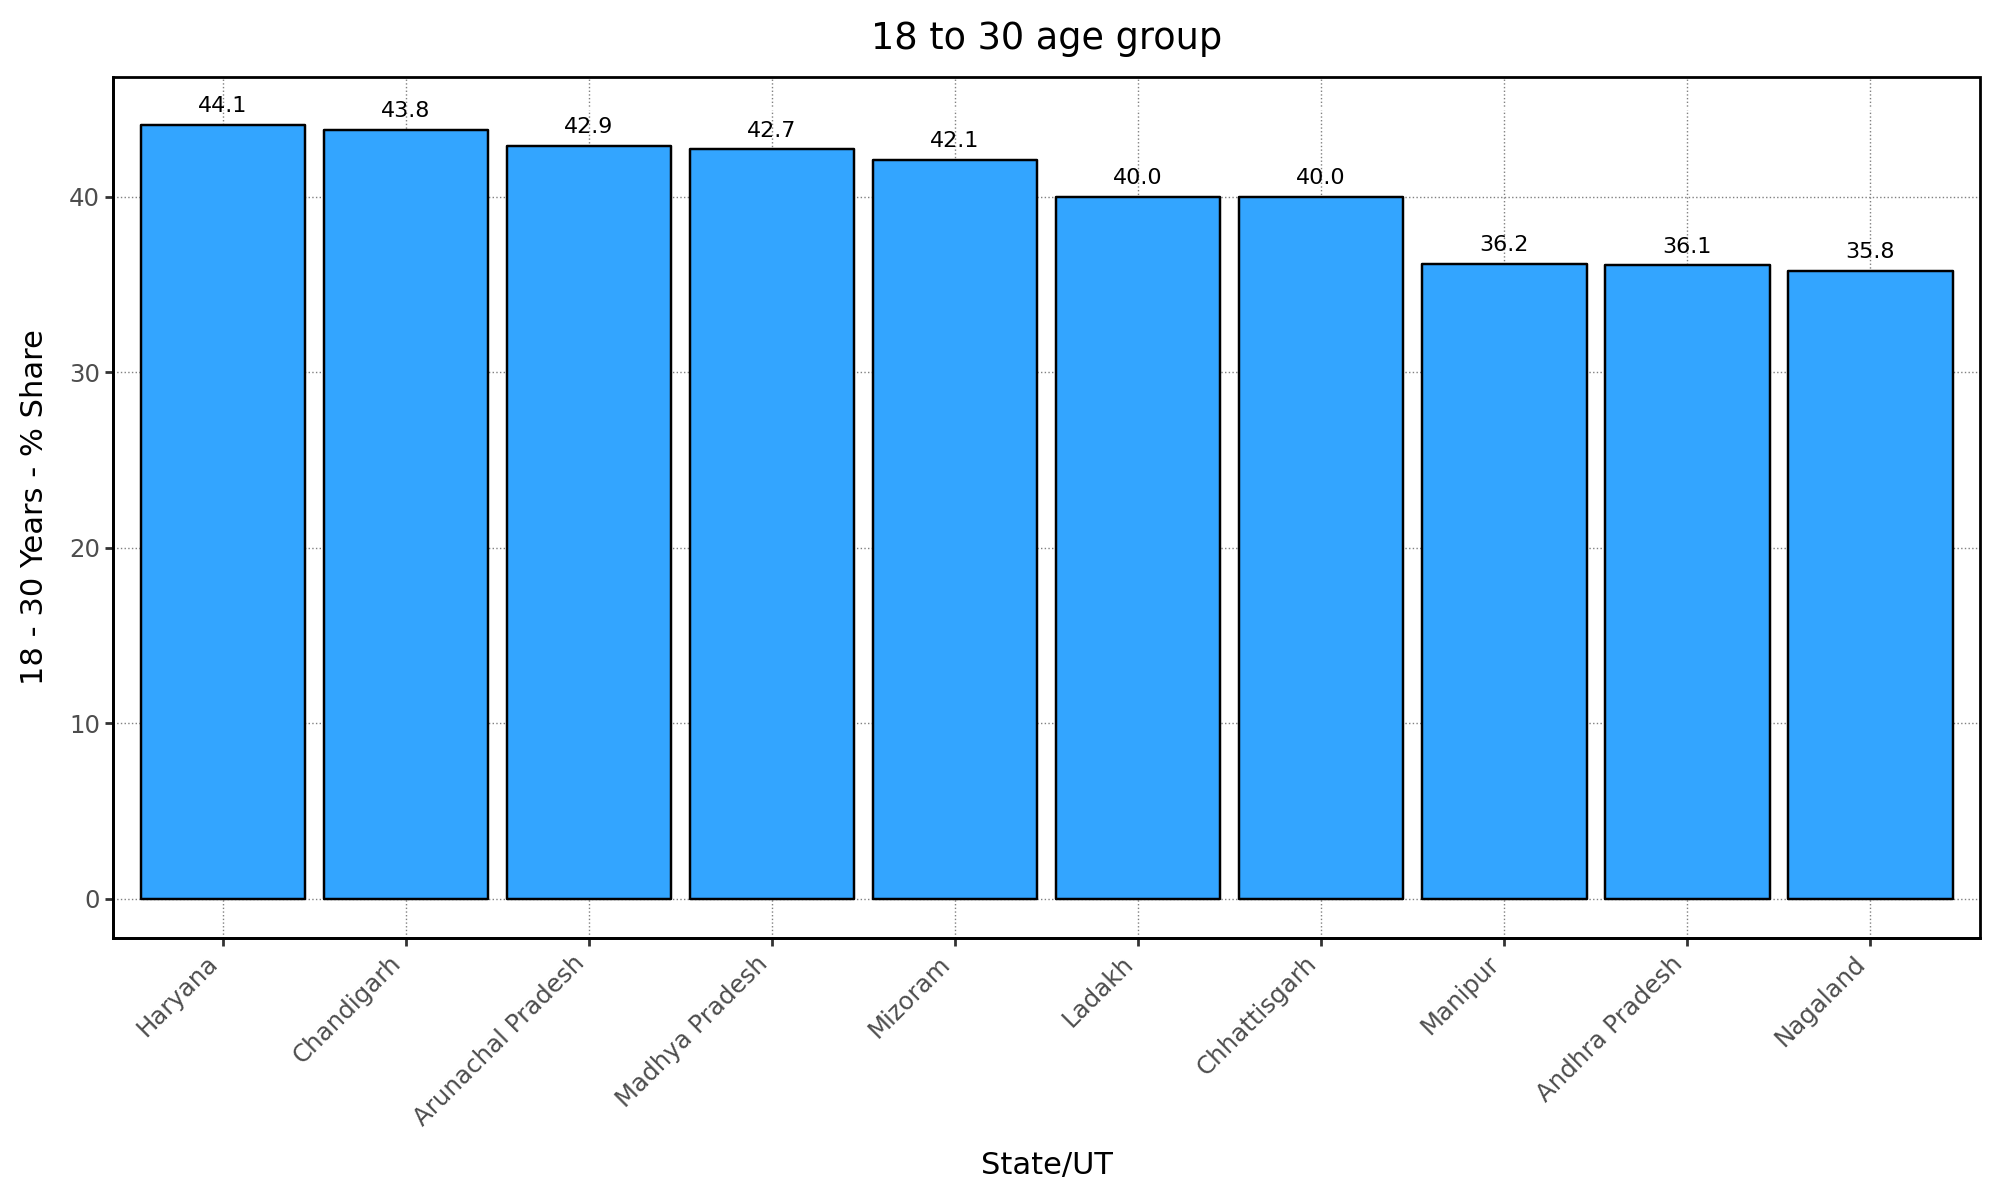

In [45]:
top10_18to30 = age.sort_values(by='18 - 30 Years - % Share', ascending=False).head(10)
top10_sorted = top10_18to30.sort_values(by='18 - 30 Years - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age18to30 = (ggplot(top10_sorted, aes(x='State/UT', y='18 - 30 Years - % Share', label='18 - 30 Years - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')  
 + labs(x='State/UT', y='18 - 30 Years - % Share', title='18 to 30 age group')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'),  
         axis_line=element_line(color='black'),      
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),
         panel_border=element_rect(color='black', fill=None),  
         figure_size=(10, 6))  
)
bar_age18to30.show()


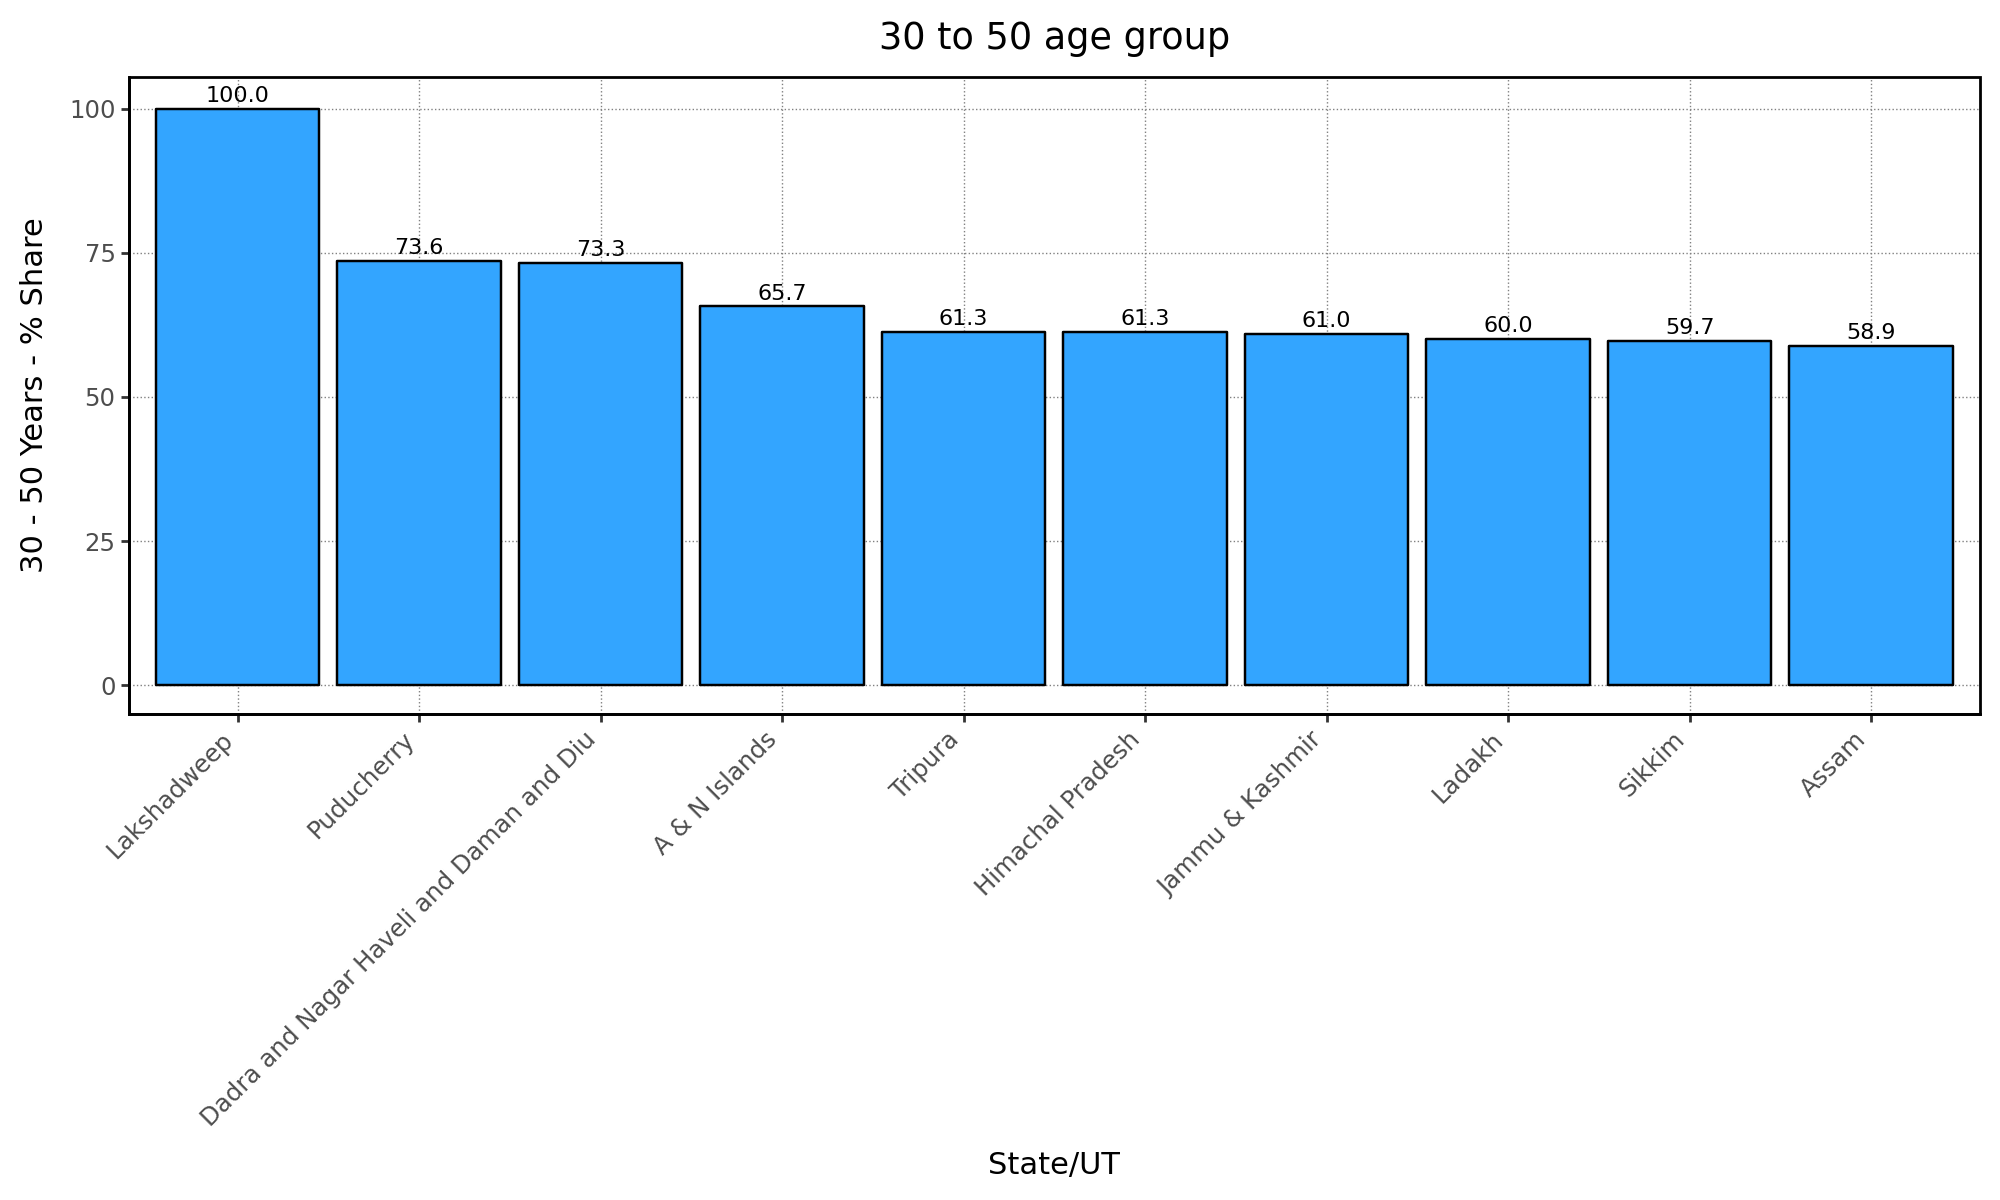

In [46]:
top10_30to50 = age.sort_values(by='30 - 50 Years - % Share', ascending=False).head(10)
top10_sorted = top10_30to50.sort_values(by='30 - 50 Years - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age30to50 = (ggplot(top10_sorted, aes(x='State/UT', y='30 - 50 Years - % Share', label='30 - 50 Years - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')  
 + labs(x='State/UT', y='30 - 50 Years - % Share', title='30 to 50 age group')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'),  
         axis_line=element_line(color='black'),        
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'), 
         panel_border=element_rect(color='black', fill=None), 
         figure_size=(10, 6)) 
)
bar_age30to50.show()

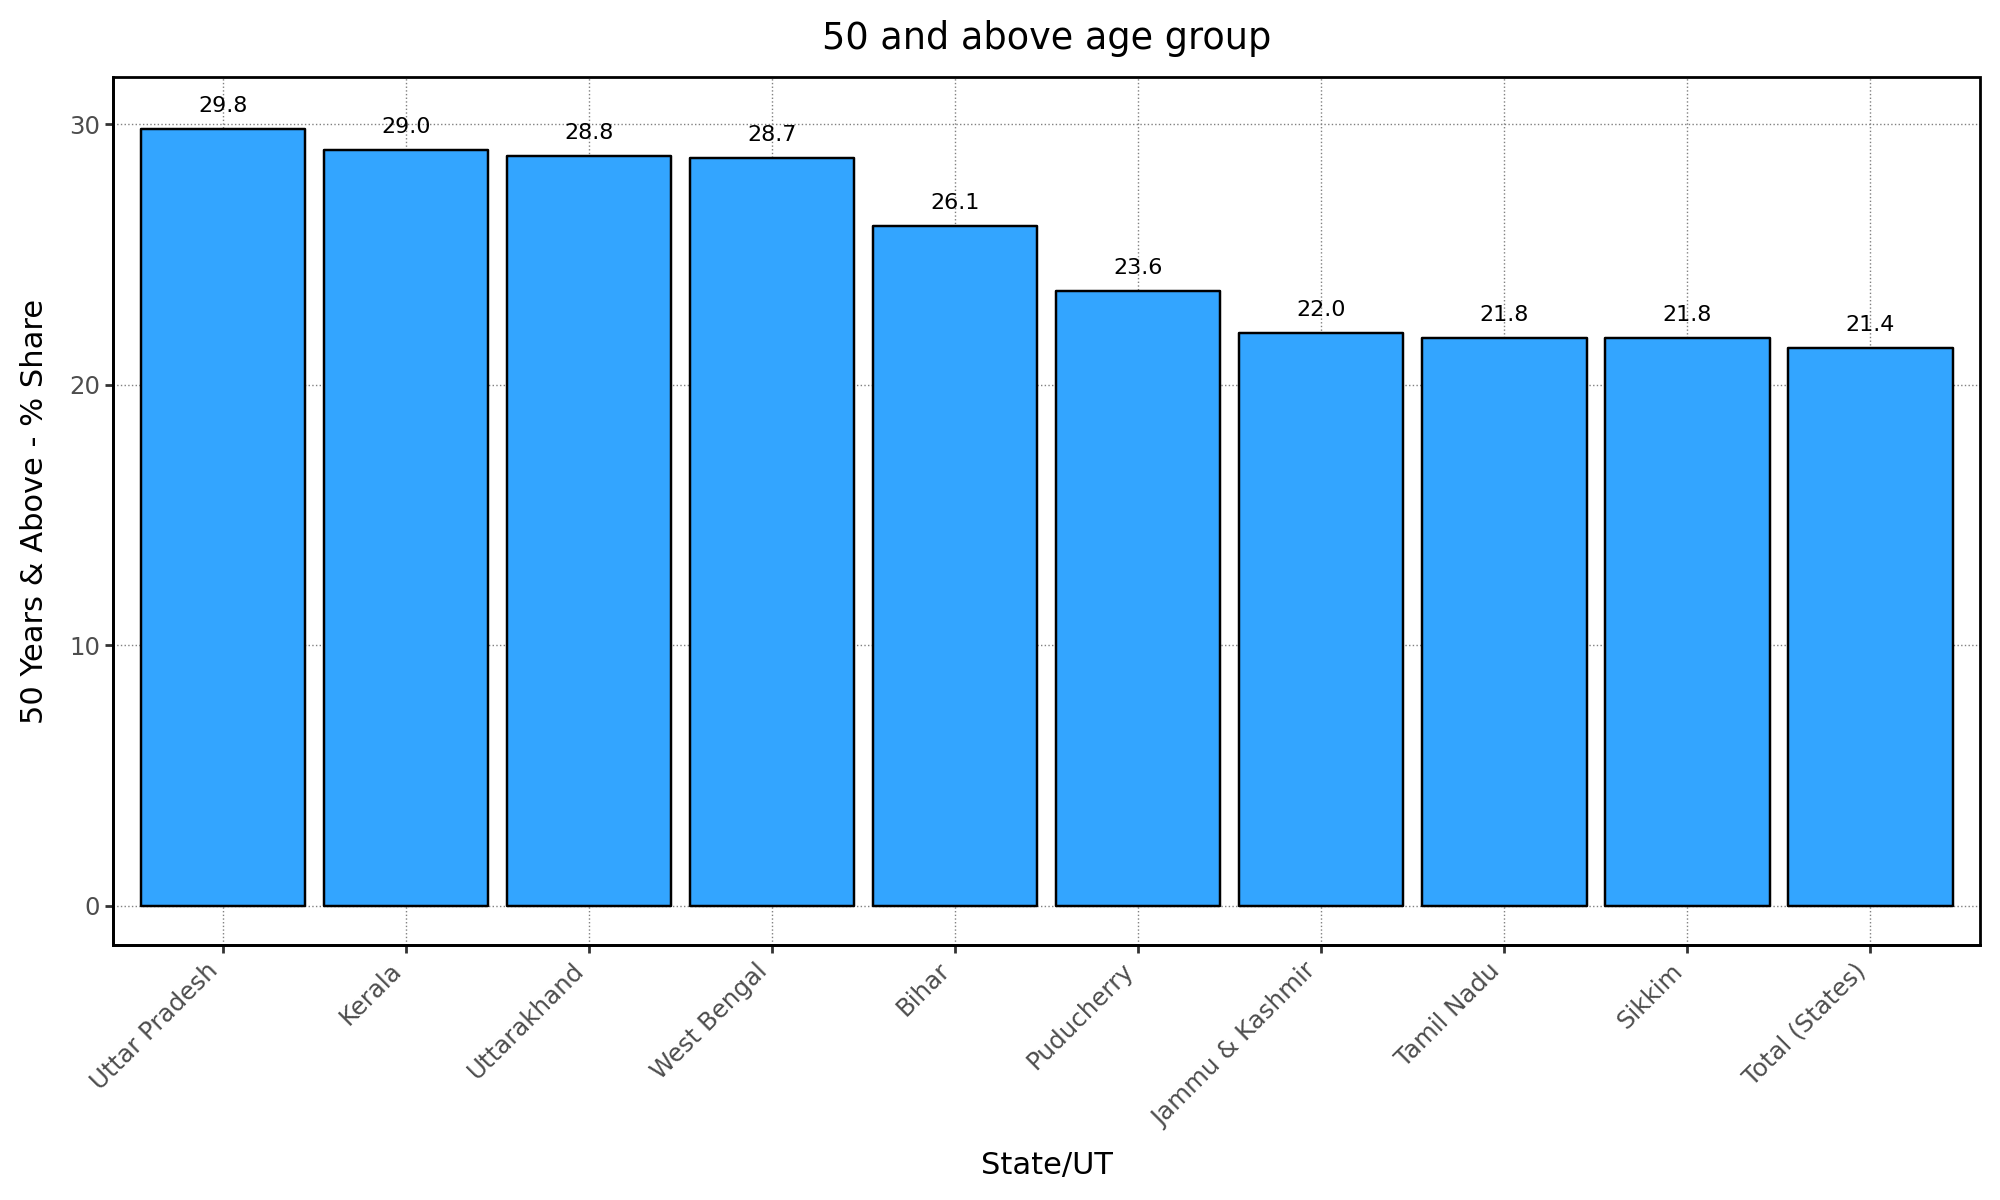

In [47]:
top10_50 =  age.sort_values(by='50 Years & Above - % Share', ascending=False).head(10)
top10_sorted = top10_50.sort_values(by='50 Years & Above - % Share', ascending=False).head(10)
sorted_states = top10_sorted['State/UT'].tolist()
top10_sorted['State/UT'] = pd.Categorical(top10_sorted['State/UT'], categories=sorted_states, ordered=True)

bar_age18to30 = (ggplot(top10_sorted, aes(x='State/UT', y='50 Years & Above - % Share', label='50 Years & Above - % Share'))
 + geom_bar(stat='identity', fill='#33A5FF', color='black')  
 + geom_text(size=8, color='black', nudge_y=0.5, va='bottom') 
 + labs(x='State/UT', y='50 Years & Above - % Share', title='50 and above age group')
 + theme(axis_text_x=element_text(rotation=45, hjust=1),
         panel_background=element_rect(fill='white'), 
         axis_line=element_line(color='black'),        
         panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),  
         panel_border=element_rect(color='black', fill=None),  
         figure_size=(10, 6))  
)
bar_age18to30.show()

## Based on Offence

In [48]:
%%capture
columns[49:]

#### We can see from the columns broadly that there are majorly 5-6 kinds of criminal activities like Offence against human body, affecting propertis, riots, specially women, counterfeiting. We'll see a distribution in all India terms among these categories and then facet each of the main 3 categories to show the top 6 crime intensive states 

In [49]:
crime = data.iloc[:,49:]
crime['State/UT'] = states

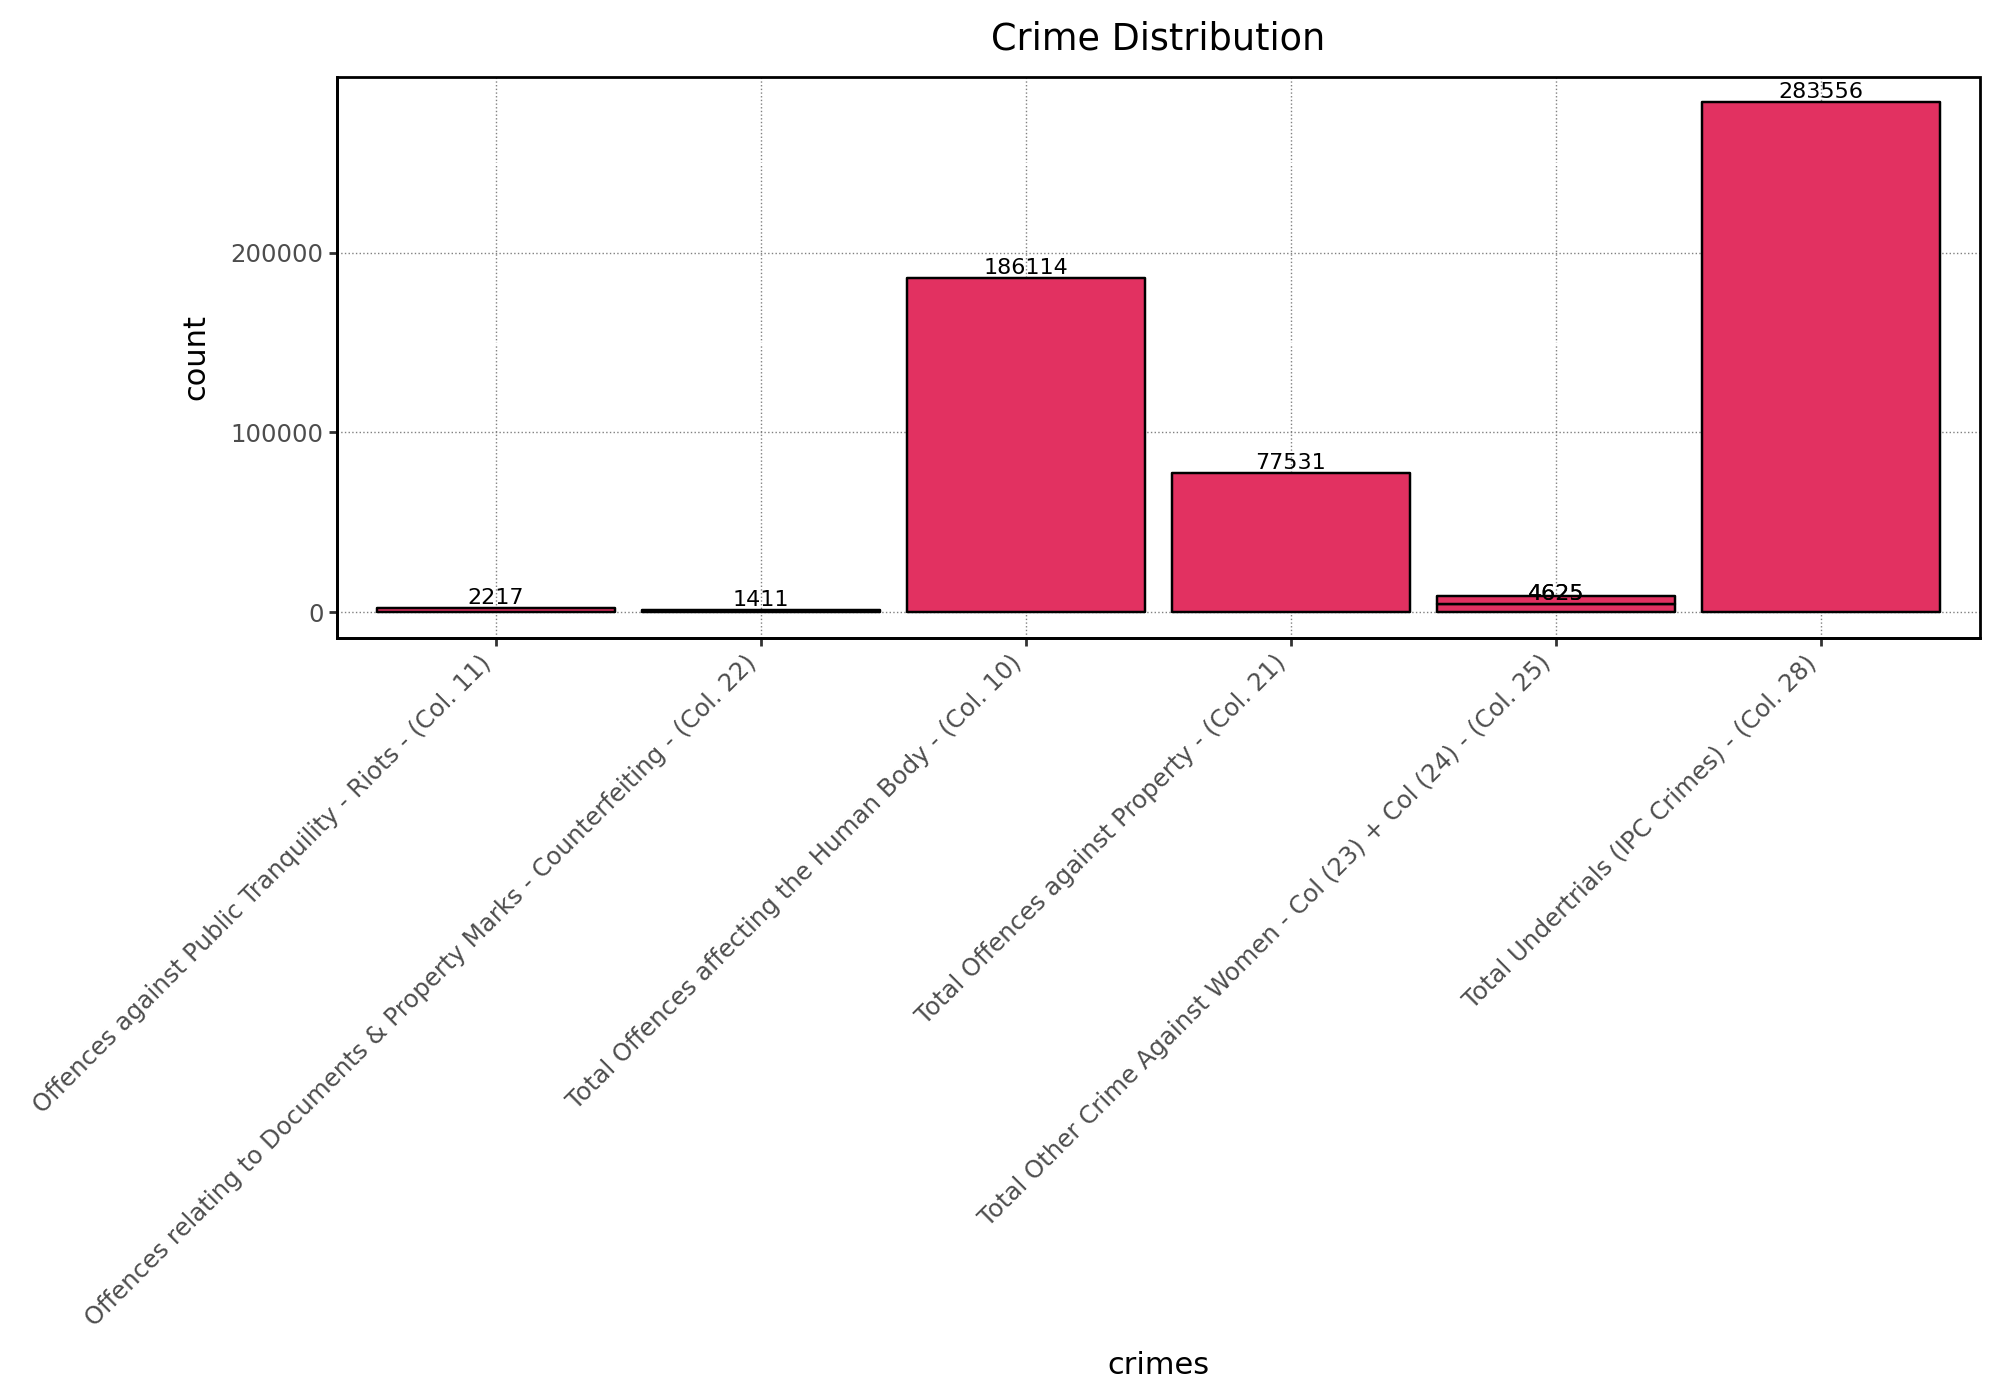

In [50]:
main_crimes = ['Total Offences affecting the Human Body - (Col. 10)','Offences against Public Tranquility - Riots - (Col. 11)','Total Offences against Property - (Col. 21)','Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22)','Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)','Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)','Total Undertrials (IPC Crimes) - (Col. 28)']
temp = pd.DataFrame()
temp['crimes'] = main_crimes
temp['count'] = crime[main_crimes].iloc[-1].values.tolist()
temp['percentage'] = (temp['count'] / temp['count'].sum()) * 100

all_india = (ggplot(temp, aes(x='crimes', y='count', label='count'))
             + geom_bar(stat='identity', fill='#E23161', color='black')
             + geom_text(size=8, color='black', nudge_y=0.5, va='bottom')
             + labs(x='crimes', y='count', title='Crime Distribution')
             + theme(axis_text_x=element_text(rotation=45, hjust=1),
                     panel_background=element_rect(fill='white'),
                     axis_line=element_line(color='black'),
                     panel_grid_major=element_line(color='gray', size=0.5, linetype='dotted'),
                     panel_border=element_rect(color='black', fill=None),
                     figure_size=(10, 7))
             )
all_india.show()

In [51]:
main_crimes = ['Total Offences affecting the Human Body - (Col. 10)',
               'Offences against Public Tranquility - Riots - (Col. 11)',
               'Total Offences against Property - (Col. 21)',
               'Offences relating to Documents & Property Marks - Counterfeiting - (Col. 22)',
               'Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)']

temp = pd.DataFrame({
    'crimes': main_crimes,
    'count': crime[main_crimes].iloc[-1].values.tolist()
})

fig = px.pie(temp, values='count', names='crimes', title='Crime Distribution')
fig.show()

### Against Human body

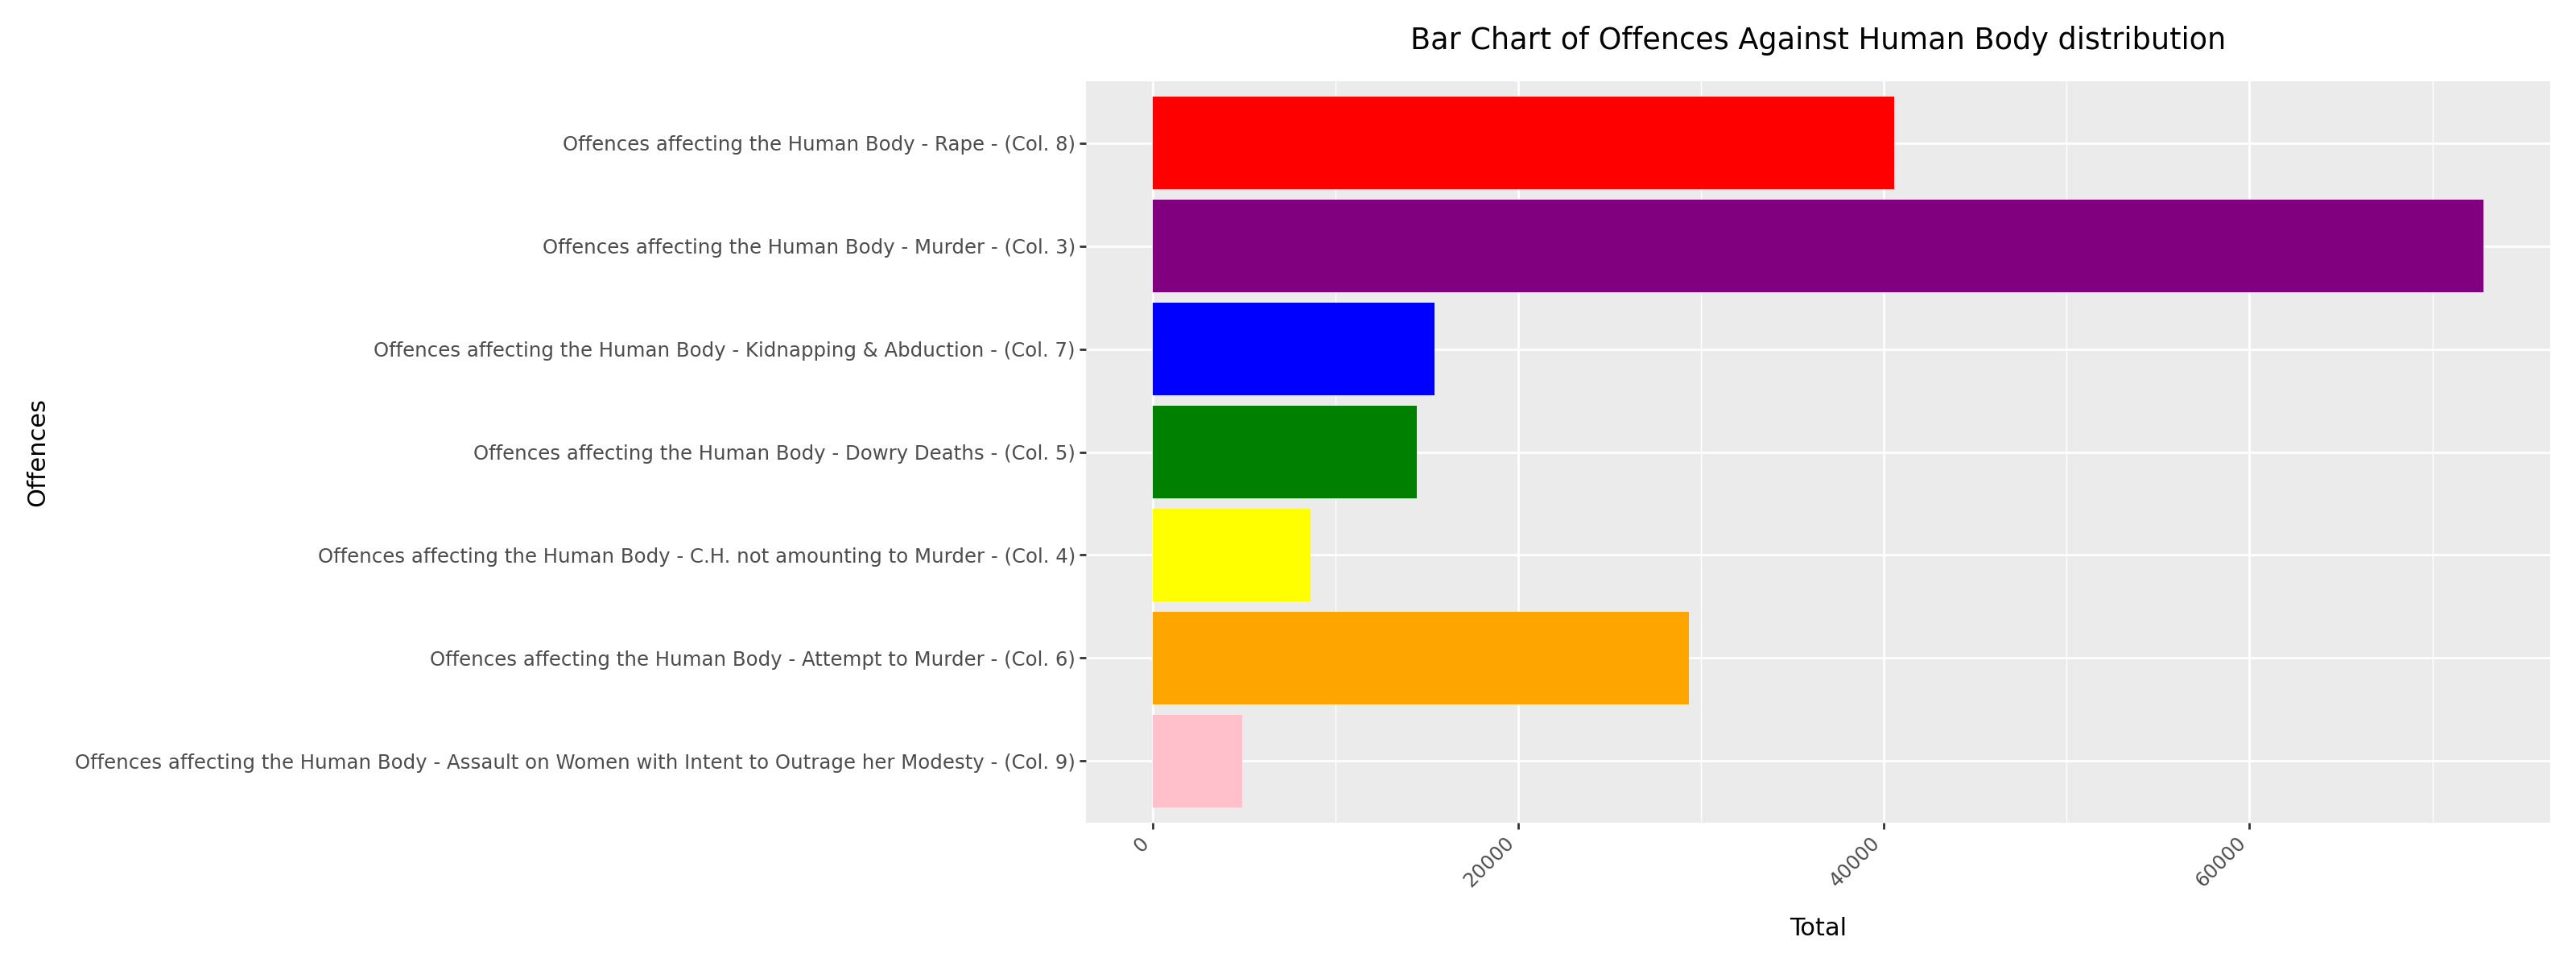

In [52]:
human_crimes = crime.columns[:7]
sizes = crime[human_crimes].iloc[-1].values.tolist()
temp = pd.DataFrame({'labels': human_crimes, 'sizes': sizes})

p = (ggplot(temp, aes(x='labels', y='sizes', fill='labels')) +
     geom_bar(stat='identity') +
     scale_fill_manual(values=['pink', 'orange', 'yellow', 'green', 'blue', 'purple','red','violet']) +
     labs(title='Bar Chart of Offences Against Human Body distribution', x='Offences', y='Total') +
     theme(axis_text_x=element_text(angle=45, hjust=1),
          figure_size=(16,6), legend_position='none') +
     coord_flip()
     )

p.show()

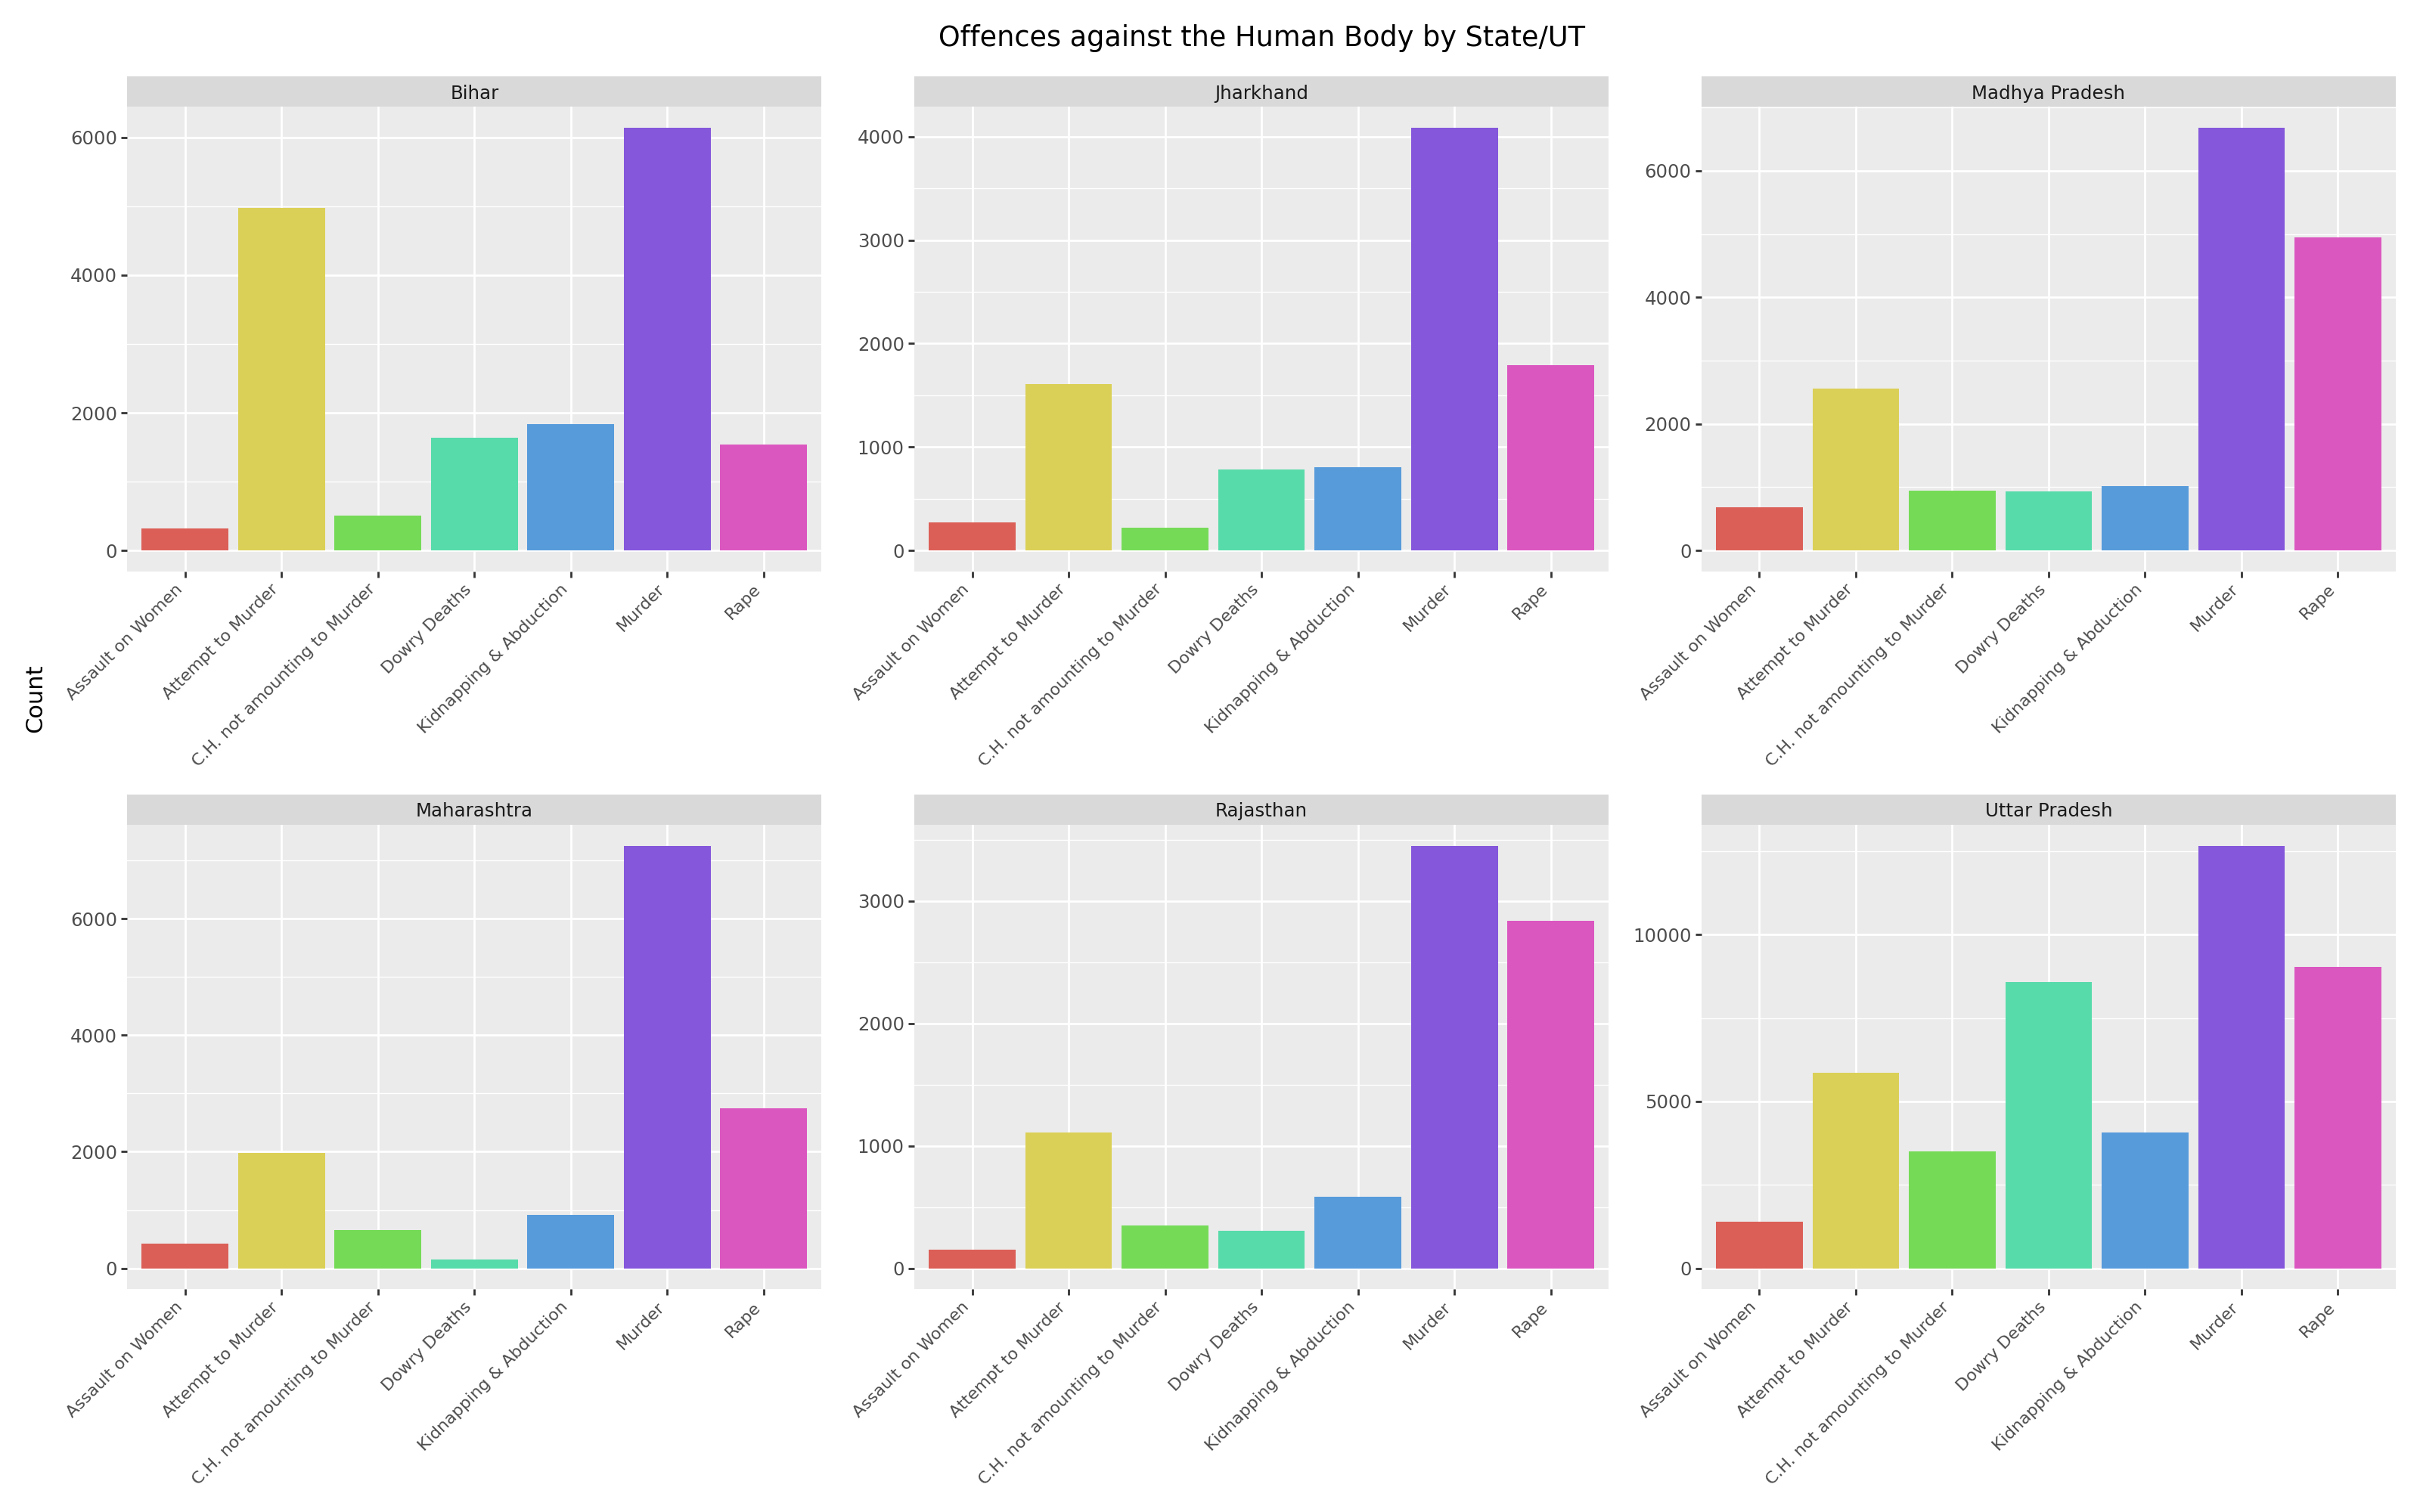

In [53]:
state_crime = crime.iloc[:28,:]
state_crime = state_crime.sort_values(by='Total Offences affecting the Human Body - (Col. 10)', ascending=False)
state_crime_human = state_crime.drop(state_crime.columns[7:-1],axis=1)
state_crime_human = state_crime_human.iloc[:6,:]
state_crime_human.columns = [
    "Murder",
    "C.H. not amounting to Murder",
    "Dowry Deaths",
    "Attempt to Murder",
    "Kidnapping & Abduction",
    "Rape",
    "Assault on Women",
    "State"
]
df_melted = state_crime_human.melt(id_vars=["State"], var_name="Offence", value_name="Count")
df_melted.columns = ['State','Offence','Count']
plot = (
    ggplot(df_melted, aes(x='Offence', y='Count', fill='Offence')) +
    geom_bar(stat='identity') +
    facet_wrap('~ State', scales='free') +  
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=8)) +  
    labs(x='', title='Offences against the Human Body by State/UT') +  
    theme(figure_size=(16,10),legend_position='none')  
)
plot.show()

### Affecting property

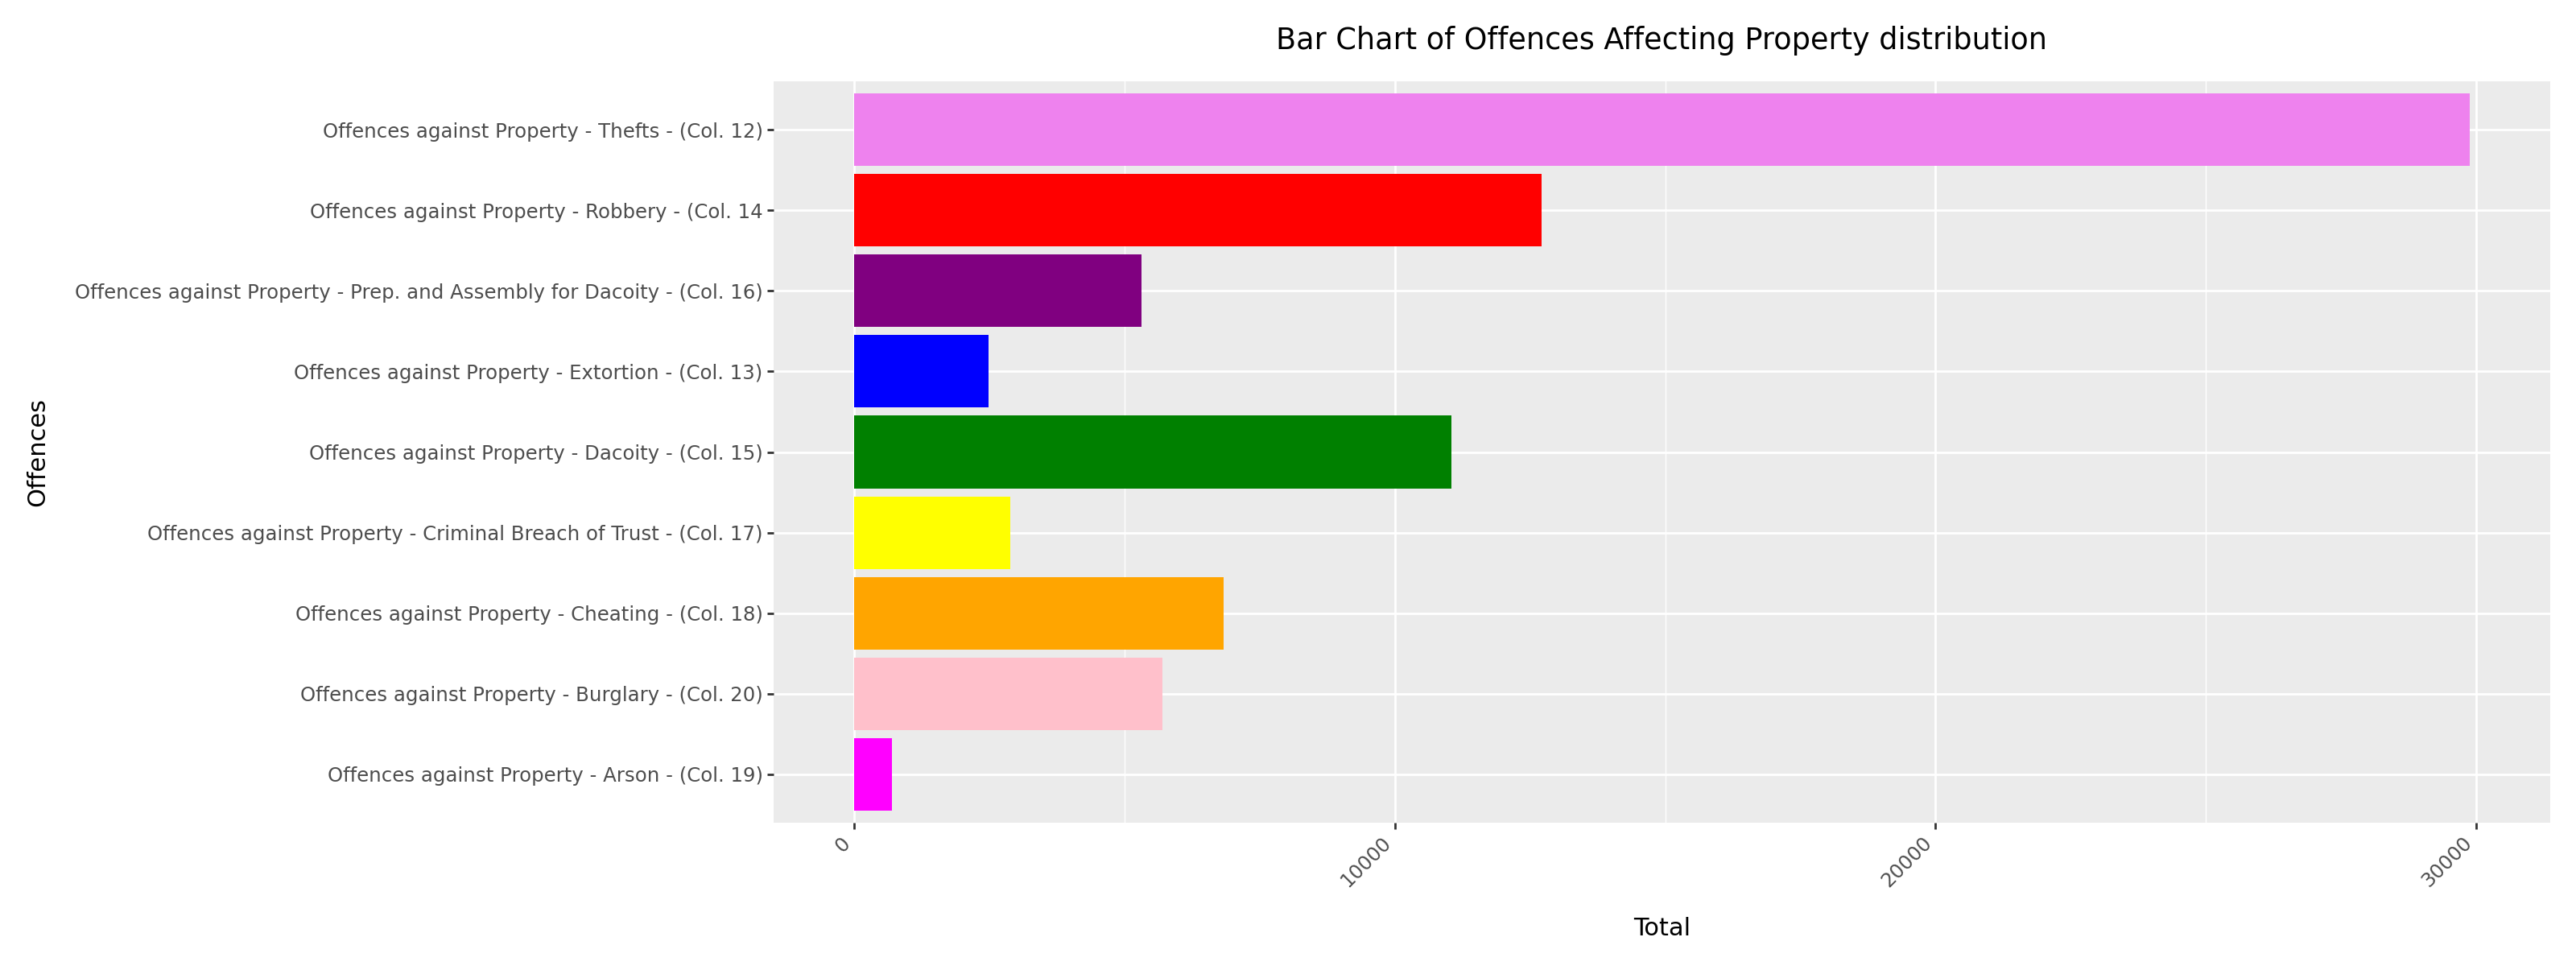

In [54]:
property_crimes = crime.columns[9:18]
sizes = crime[property_crimes].iloc[-1].values.tolist()
temp = pd.DataFrame({'labels': property_crimes, 'sizes': sizes})

p = (ggplot(temp, aes(x='labels', y='sizes', fill='labels')) +
     geom_bar(stat='identity') +
     scale_fill_manual(values=['magenta','pink', 'orange', 'yellow', 'green', 'blue', 'purple','red','violet']) +
     labs(title='Bar Chart of Offences Affecting Property distribution', x='Offences', y='Total') +
     theme(axis_text_x=element_text(angle=45, hjust=1),
          figure_size=(16,6), legend_position='none') +
     coord_flip()
     )
p.show()

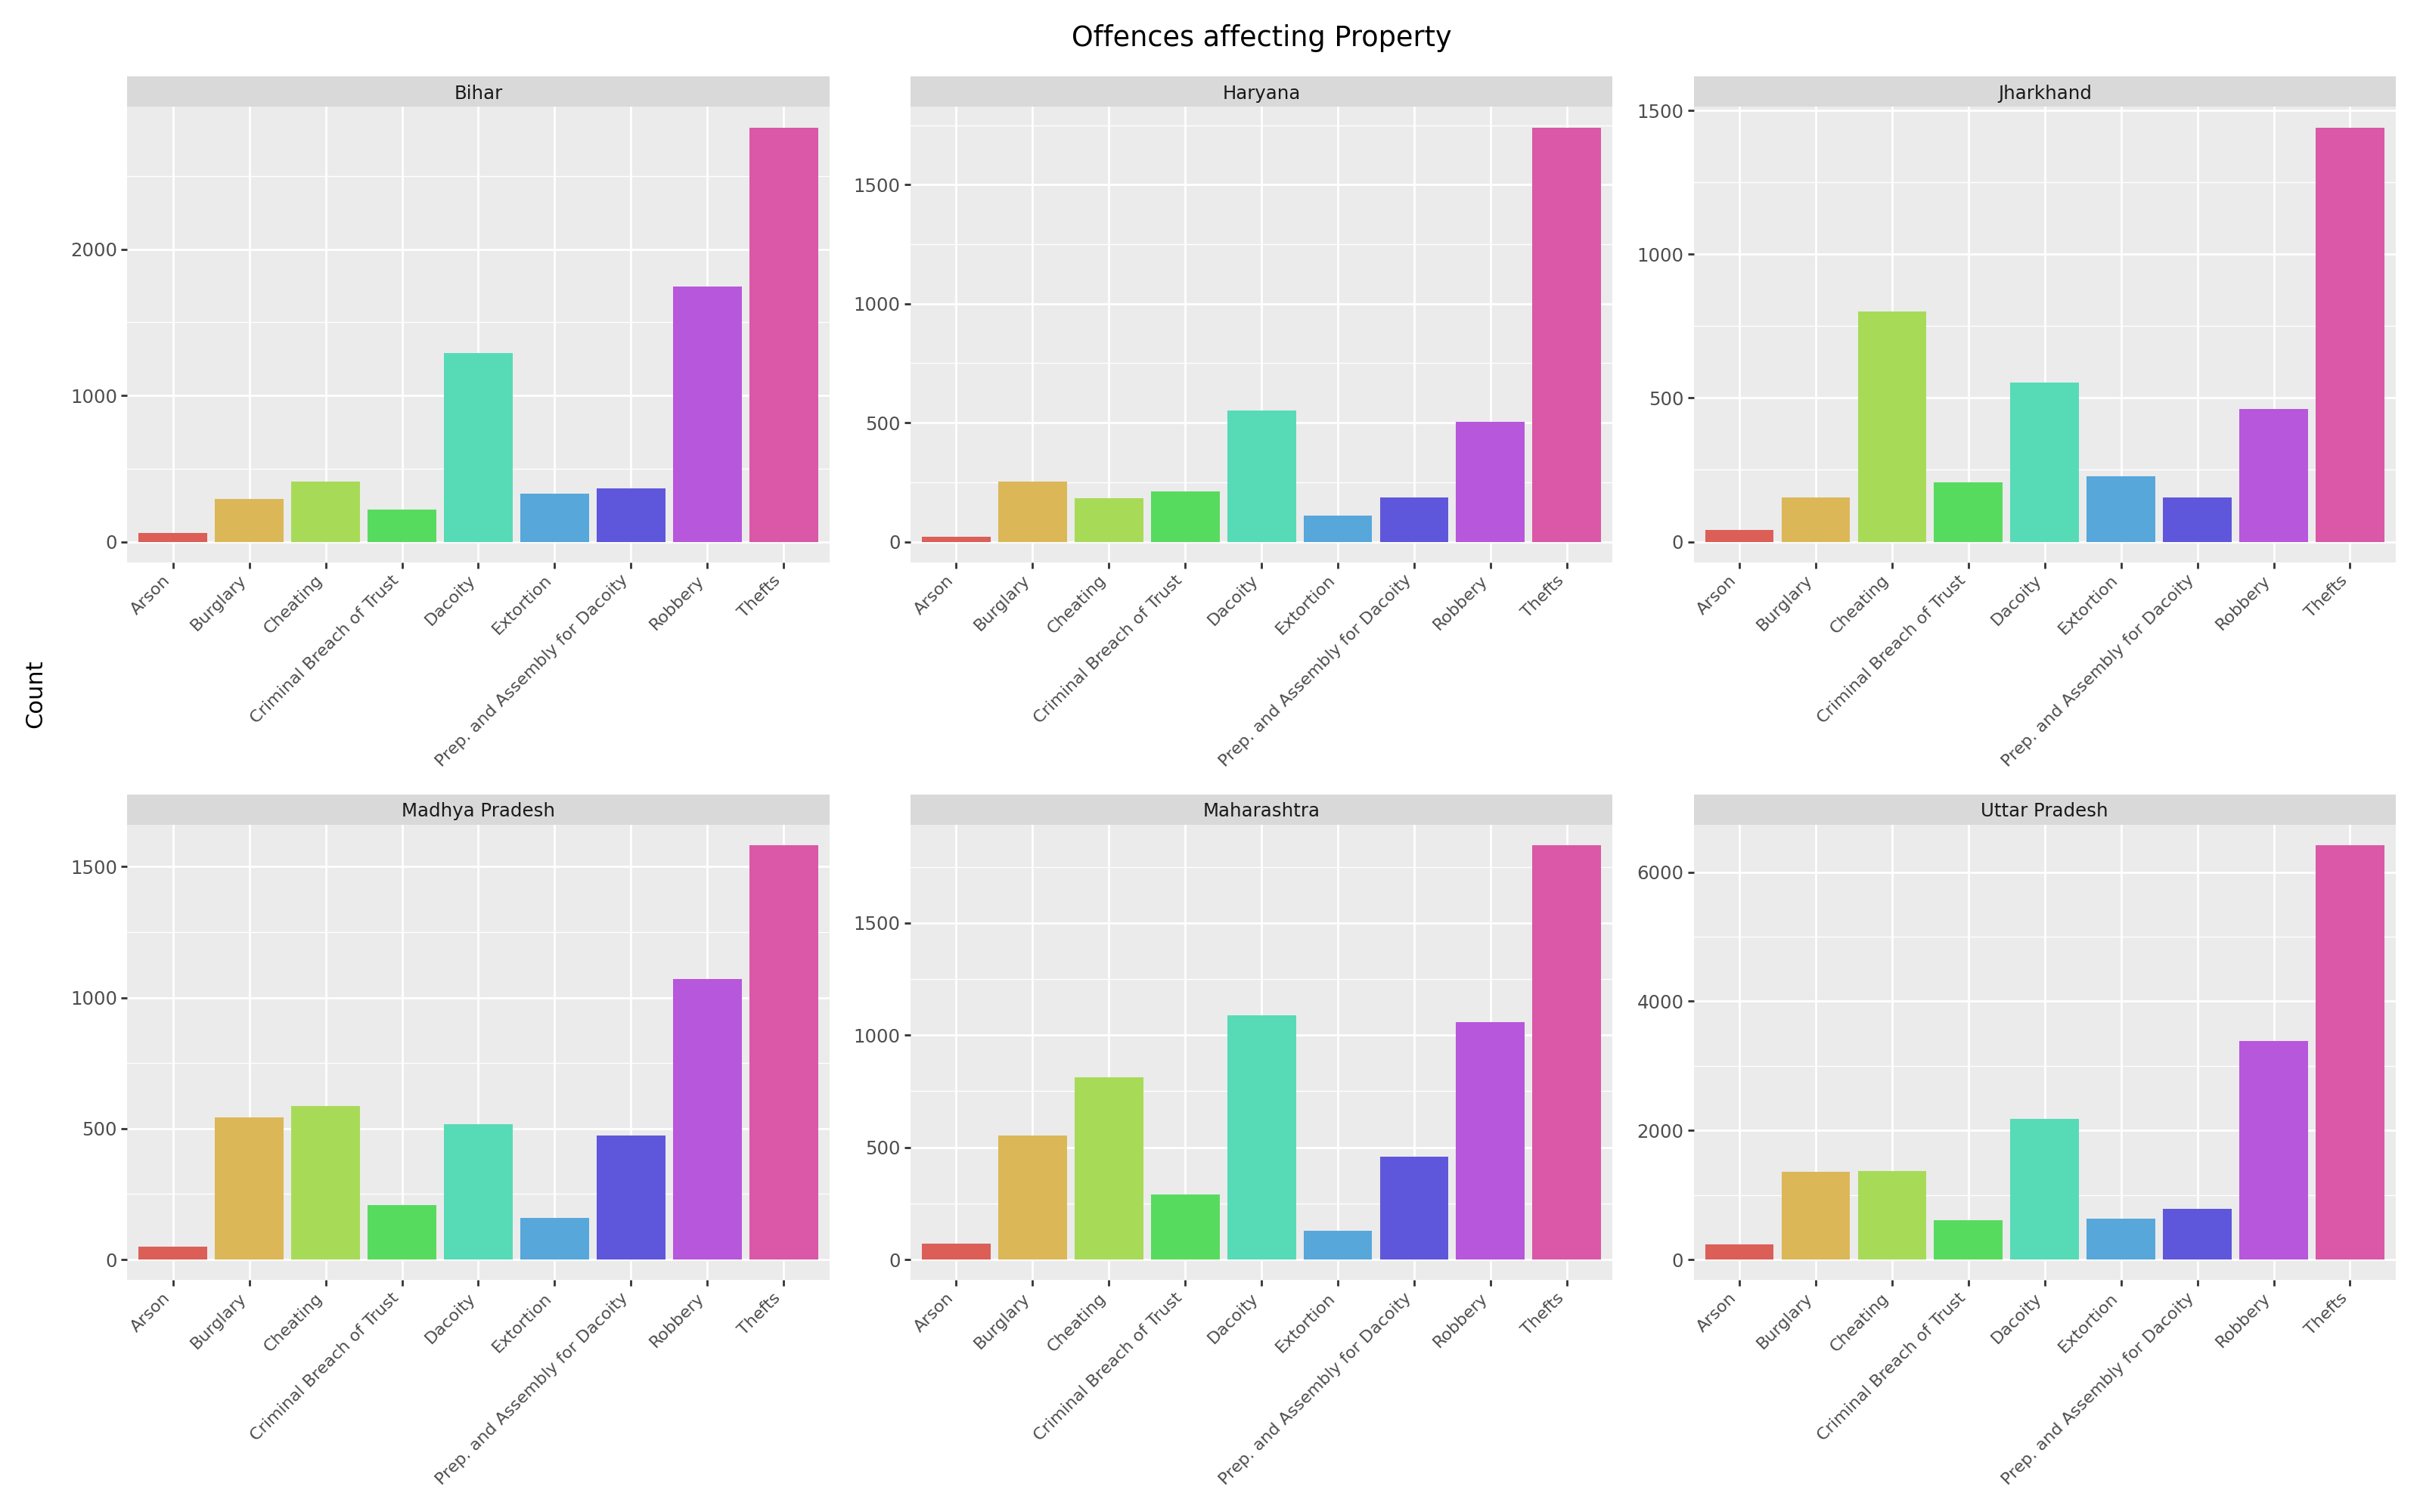

In [55]:
state_crime = crime.iloc[:28,:]
state_crime = state_crime.sort_values(by='Total Offences against Property - (Col. 21)', ascending=False)
state_crime_property = state_crime.drop(state_crime.columns[:9],axis=1)
state_crime_property = state_crime_property.drop(state_crime_property.columns[9:-1],axis=1)
state_crime_property = state_crime_property.iloc[:6,:]
state_crime_property.columns = [
    "Thefts",
    "Extortion",
    "Robbery",
    "Dacoity",
    "Prep. and Assembly for Dacoity",
    "Criminal Breach of Trust",
    "Cheating",
    "Arson",
    "Burglary",
    "State"
]
df_melted = state_crime_property.melt(id_vars=["State"], var_name="Offence", value_name="Count")
df_melted.columns = ['State','Offence','Count']
plot = (
    ggplot(df_melted, aes(x='Offence', y='Count', fill='Offence')) +
    geom_bar(stat='identity') +
    facet_wrap('~ State', scales='free') +  
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=8)) +  
    labs(x='', title='Offences affecting Property') +  
    theme(figure_size=(16,10),legend_position='none')  
)
plot.show()

### Against Women

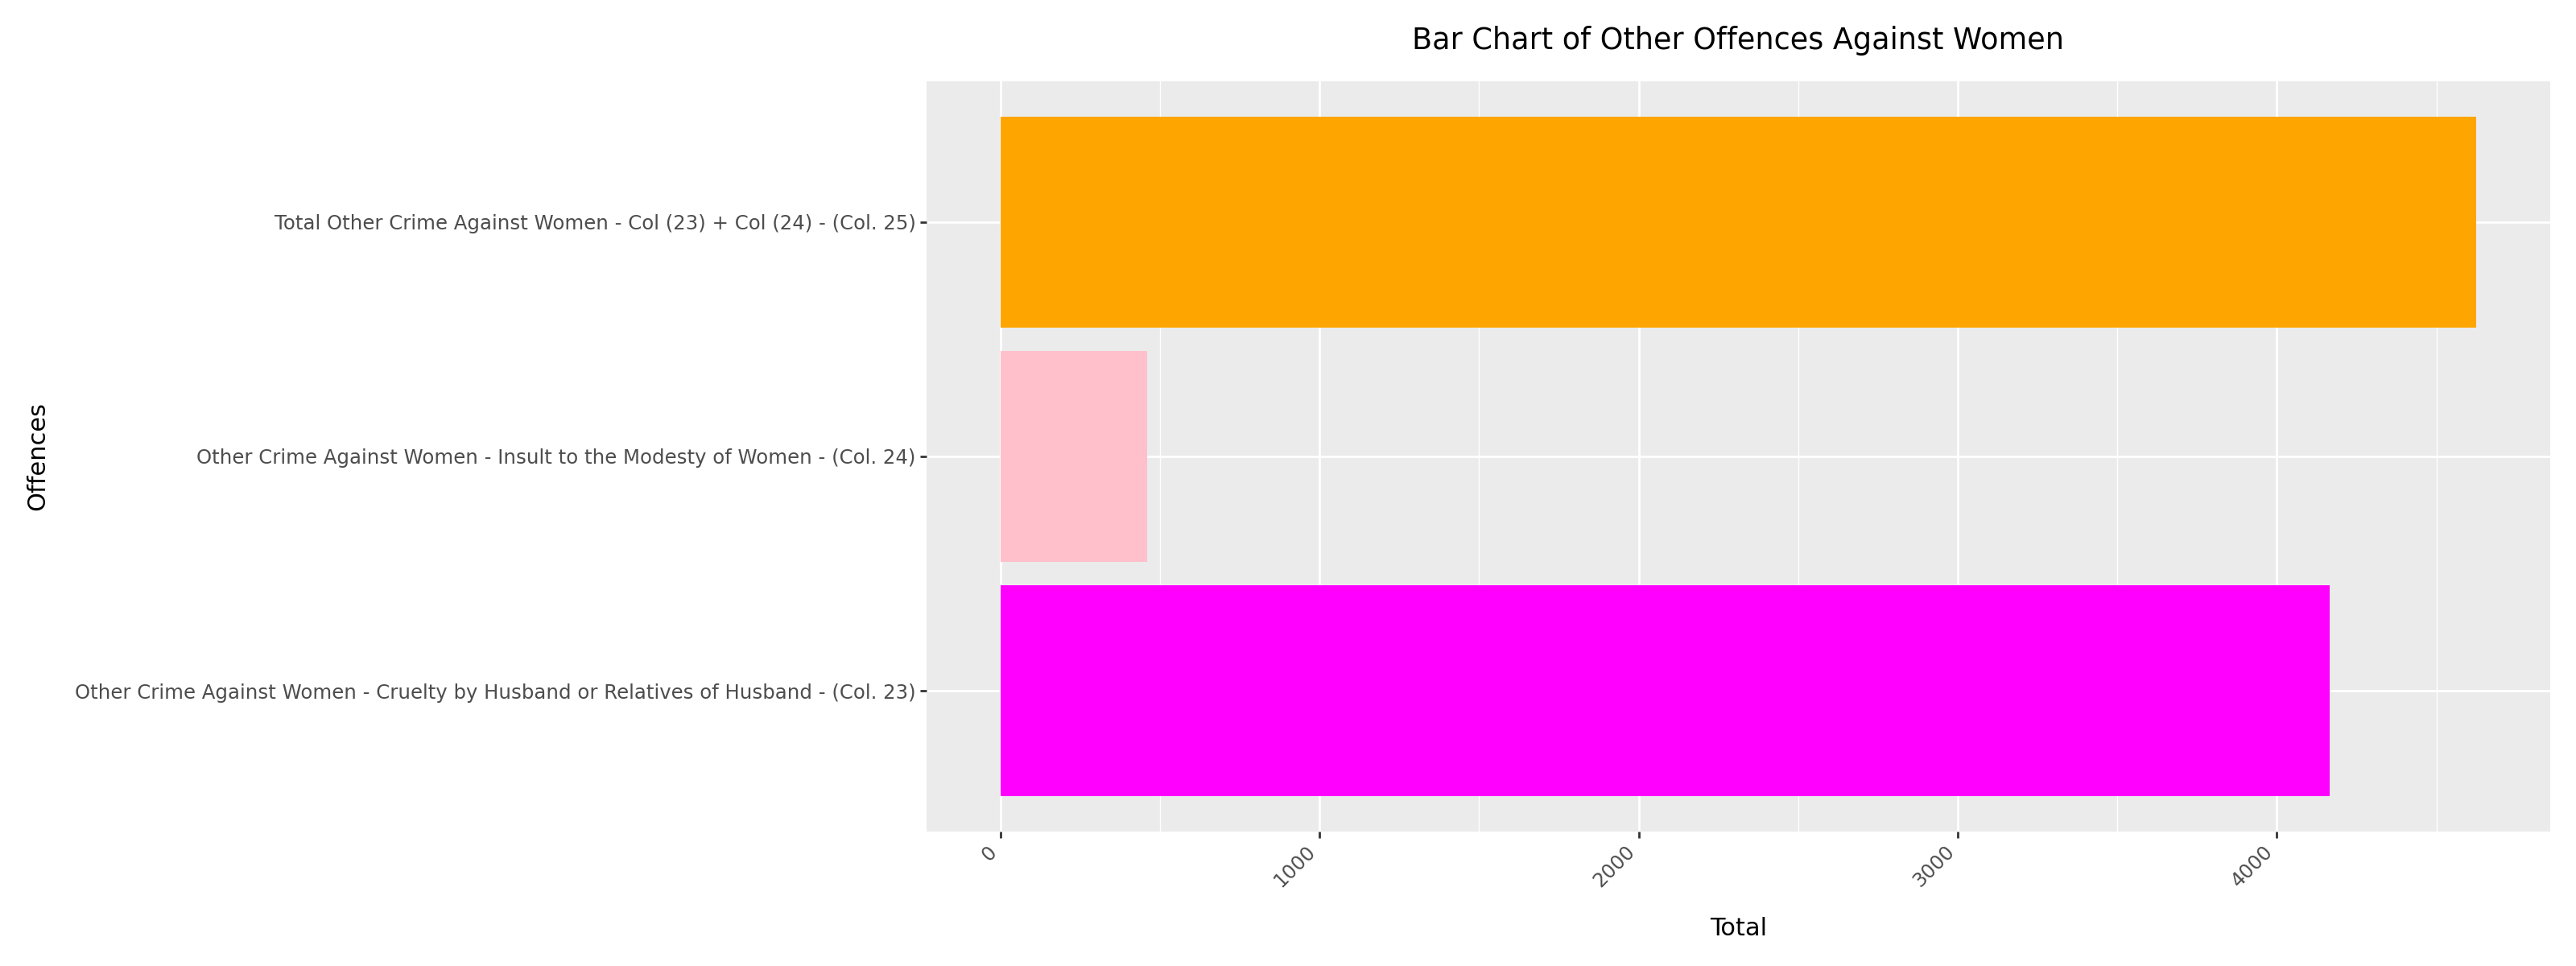

In [56]:
women_crimes = crime.columns[20:23]
sizes = crime[women_crimes].iloc[-1].values.tolist()
temp = pd.DataFrame({'labels': women_crimes, 'sizes': sizes})

p = (ggplot(temp, aes(x='labels', y='sizes', fill='labels')) +
     geom_bar(stat='identity') +
     scale_fill_manual(values=['magenta','pink', 'orange', 'yellow', 'green', 'blue', 'purple','red','violet']) +
     labs(title='Bar Chart of Other Offences Against Women', x='Offences', y='Total') +
     theme(axis_text_x=element_text(angle=45, hjust=1),
          figure_size=(16,6), legend_position='none') +
     coord_flip()
     )
p.show()

In [57]:
crime.columns[20:23]

Index(['Other Crime Against Women - Cruelty by Husband or Relatives of Husband - (Col. 23)',
       'Other Crime Against Women - Insult to the Modesty of Women - (Col. 24)',
       'Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)'],
      dtype='object')

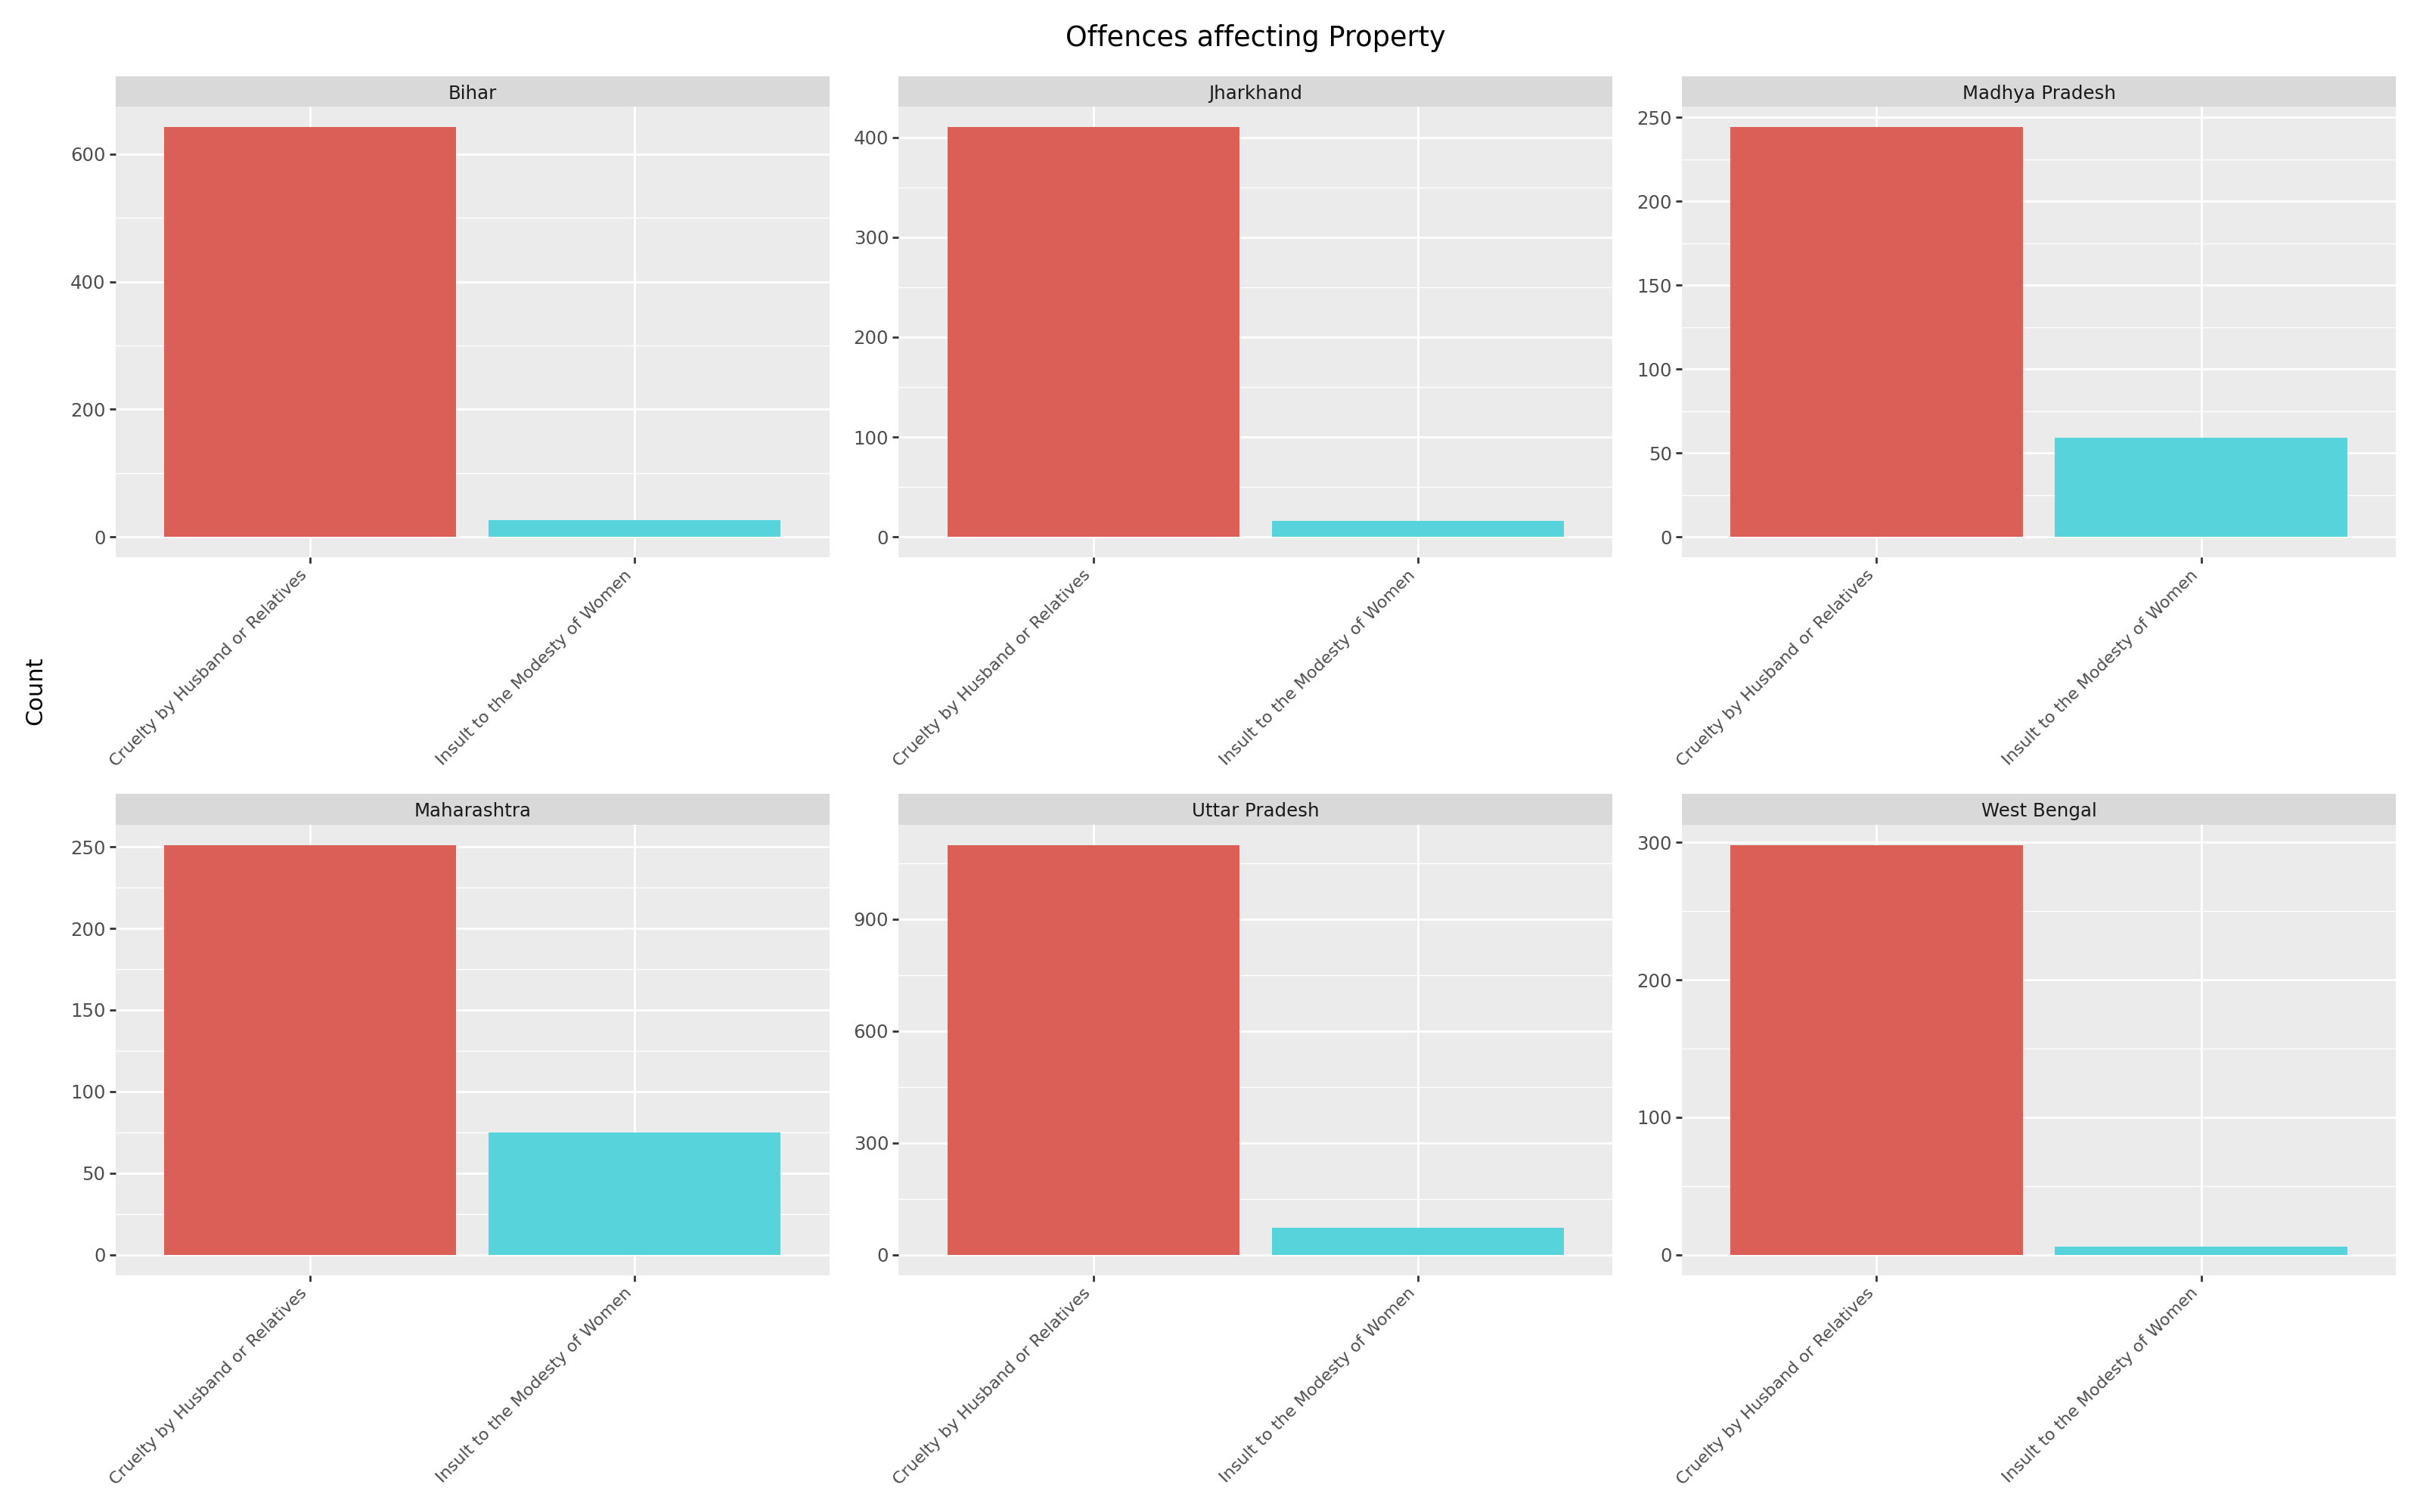

In [58]:
state_crime = state_crime.sort_values(by='Total Other Crime Against Women - Col (23) + Col (24) - (Col. 25)', ascending=False)
state_crime_women = state_crime.drop(state_crime.columns[:20],axis=1)
state_crime_women = state_crime_women.drop(state_crime_women.columns[2:-1],axis=1)
state_crime_women = state_crime_women.iloc[:6,:]
state_crime_women.columns = [
    "Cruelty by Husband or Relatives",
    "Insult to the Modesty of Women",
    "State"
]
df_melted = state_crime_women.melt(id_vars=["State"], var_name="Offence", value_name="Count")
df_melted.columns = ['State','Offence','Count']
plot = (
    ggplot(df_melted, aes(x='Offence', y='Count', fill='Offence')) +
    geom_bar(stat='identity') +
    facet_wrap('~ State', scales='free') +  
    theme(axis_text_x=element_text(rotation=45, hjust=1, size=8)) +  
    labs(x='', title='Offences affecting Property') +  
    theme(figure_size=(16,10),legend_position='none')  
)
plot.show()

## Religion

In [59]:
religion = columns[13:19]
religion_data = data[religion]
religion_data['State/UT'] = states

/tmp/ipykernel_34/2826693683.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
labels = ['Hindu','Muslim','Sikh','Christians','Others']
values = religion_data.iloc[-1].values.tolist()

pull = [0.1, 0, 0,0,0]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors), pull=pull)])
fig.update_layout(title='Religion Distribution')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Gender

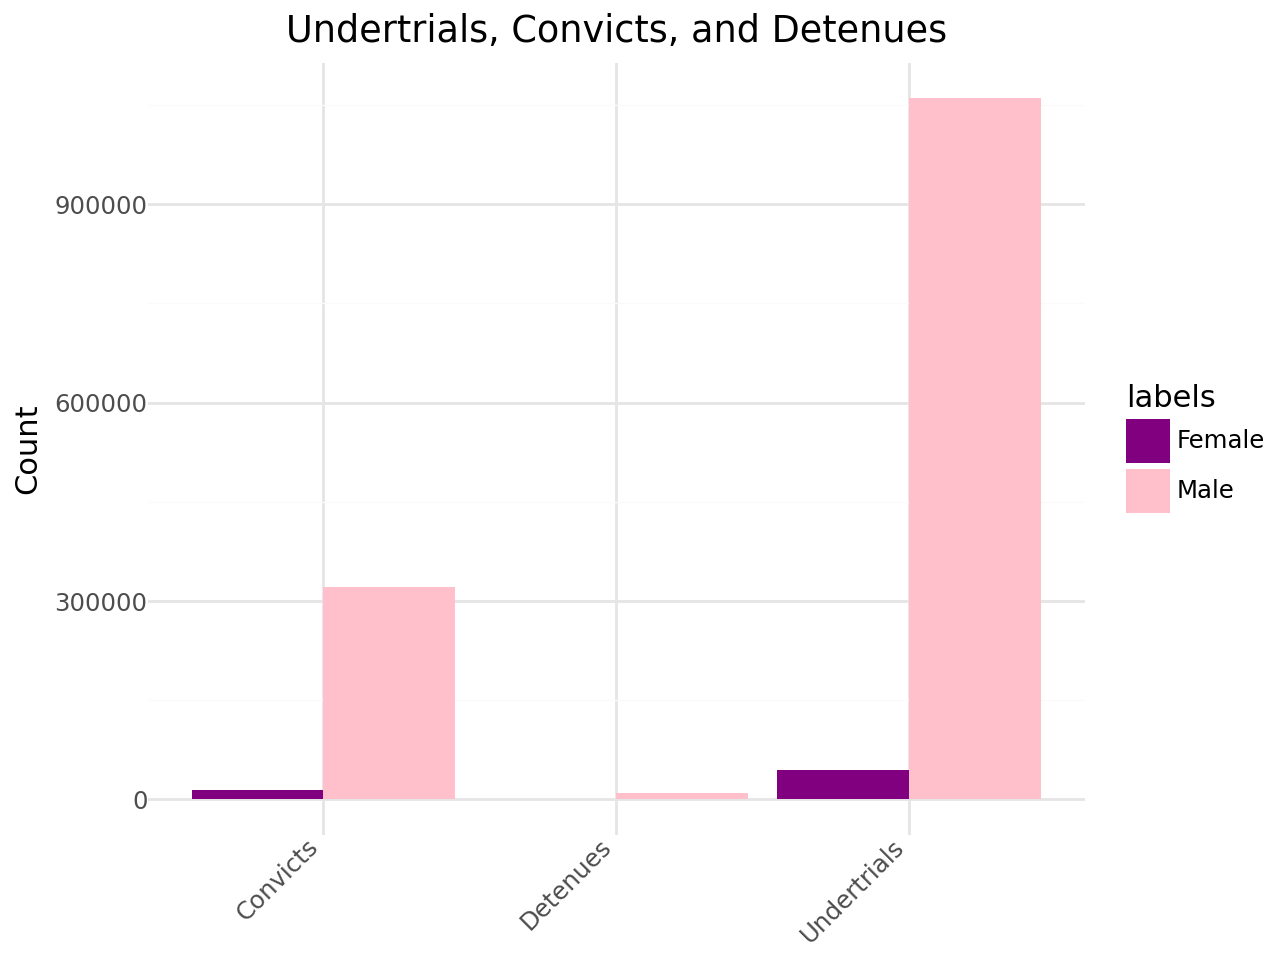

In [61]:
labels = ['Male', 'Female']
ut_sizes = [data['Undertrials - Male'].sum(), data['Undertrials - Female'].sum()]
ut_colors = ['purple', 'pink']

c_sizes = [data['Convicts - Male'].sum(), data['Convicts - Female'].sum()]
c_colors = ['orange', 'pink']

d_sizes = [data['Detenues - Male'].sum(), data['Detenues - Female'].sum()]
d_colors = ['purple', 'pink']

ut_df = pd.DataFrame({'labels': labels, 'sizes': ut_sizes, 'colors': ut_colors, 'category': 'Undertrials'})
c_df = pd.DataFrame({'labels': labels, 'sizes': c_sizes, 'colors': c_colors, 'category': 'Convicts'})
d_df = pd.DataFrame({'labels': labels, 'sizes': d_sizes, 'colors': d_colors, 'category': 'Detenues'})
plot_df = pd.concat([ut_df, c_df, d_df])

(ggplot(plot_df, aes(x='category', y='sizes', fill='labels')) +
 geom_bar(stat='identity', position='dodge') +
 scale_fill_manual(values=['purple', 'pink']) +
 theme_minimal() +
 theme(axis_text_x=element_text(rotation=45, hjust=1)) +
 labs(title='Undertrials, Convicts, and Detenues', x='', y='Count')
)

In [62]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add traces
fig.add_trace(go.Pie(labels=labels, values=ut_sizes, marker=dict(colors=ut_colors), name='Undertrials'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=c_sizes, marker=dict(colors=c_colors), name='Convicts'), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=d_sizes, marker=dict(colors=d_colors), name='Detenues'), 1, 3)

# Update layout
fig.update_layout(title_text='Undertrials, Convicts, and Detenues')

fig.show()